# `Flight Price Prediction`

## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

<b>FEATURES:</b>

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,LassoCV,Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,PowerTransformer,StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [1197]:
df_train=pd.read_excel("D:\\Data Trained\\evaluationPhase\\Flight Price Prediction\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


Showing Training dataset.

In [1198]:
df_test=pd.read_excel("D:\\Data Trained\\evaluationPhase\\Flight Price Prediction\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


Showing Test dataset.

In [1199]:
df_train.shape

(10683, 11)

Training data has 10683 no. of records and 11 columns.

In [1200]:
df_test.shape

(2671, 10)

Test data has 2671 no. of records and 10 columns that all are features only.

In [1201]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1202]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


Features are of object dtype and label is numerical dtype.

In [1203]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


here the max value for price seems like outlier but its label too. we have to analyse for these types records.

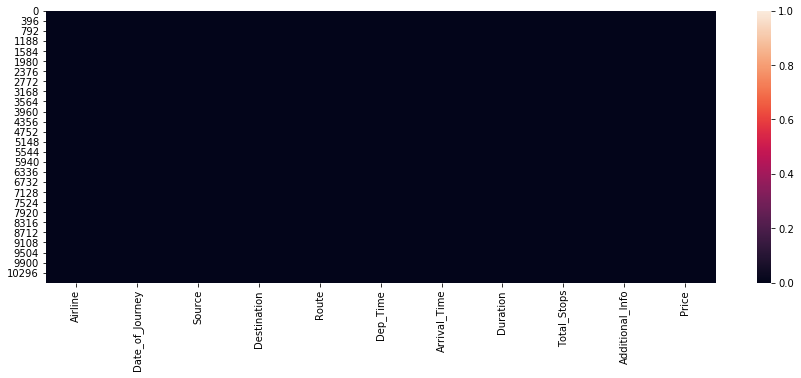

In [1204]:
plt.figure(figsize=(15,5))
sns.heatmap(df_train.isnull())
plt.show()

No null Values.

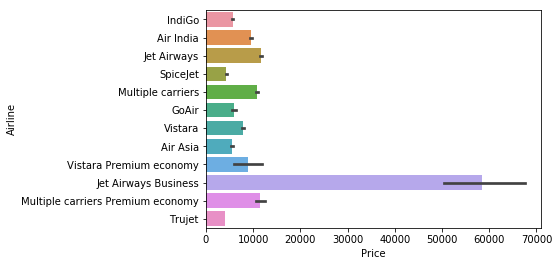

In [1205]:
sns.barplot(df_train['Price'],df_train['Airline'])

Jet Airways Bussiness claas flights has high rate of ticket Price.

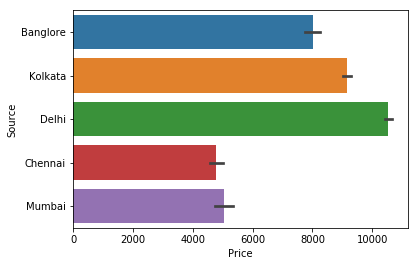

In [1206]:
sns.barplot(df_train['Price'],df_train['Source'])

The flights source Delhi has high price for tickets.

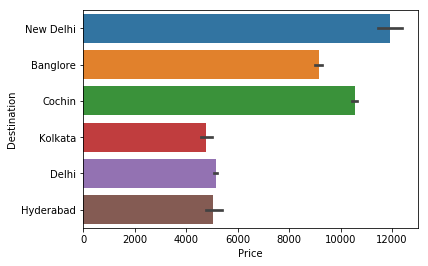

In [1207]:
sns.barplot(df_train['Price'],df_train['Destination'])

Most Expensive Ticket price for destination is for New Delhi.

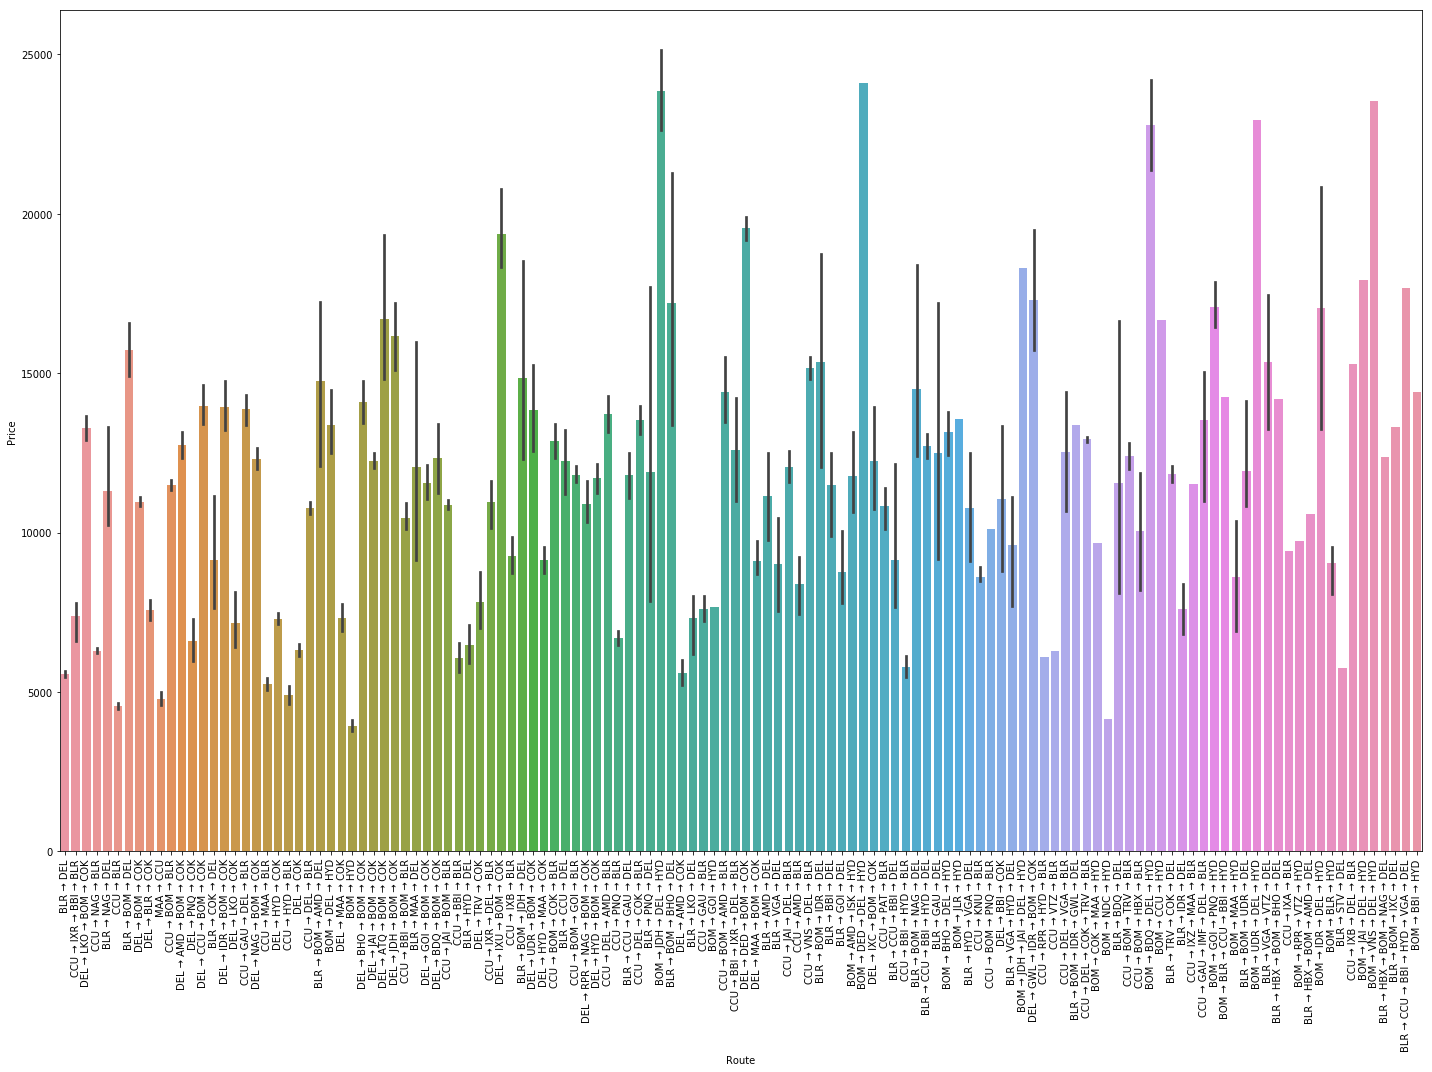

In [1208]:
plt.figure(figsize=(20,15))
sns.barplot(df_train['Route'],df_train['Price'])
plt.xticks(rotation=90)
plt.tight_layout()

BOM → JDH → DEL → HYD has the highest minimum price to travelled.

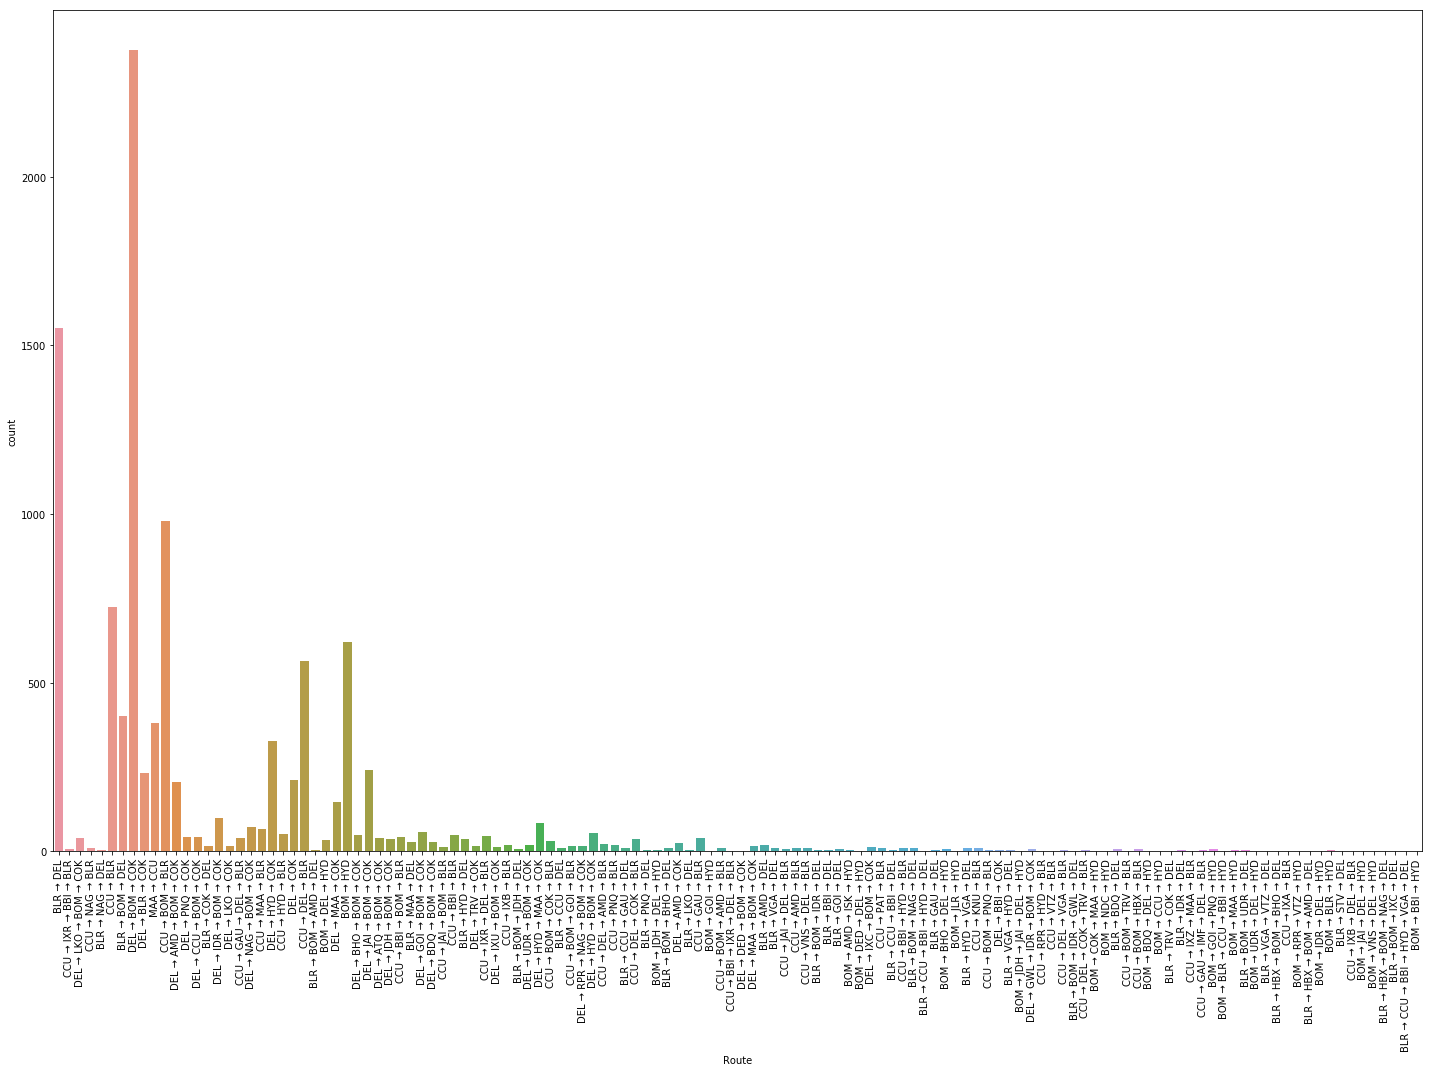

In [1209]:
plt.figure(figsize=(20,15))
sns.countplot(df_train.Route)
plt.xticks(rotation=90)
plt.tight_layout()

DEL → BOM → COK  has highest travelled route.

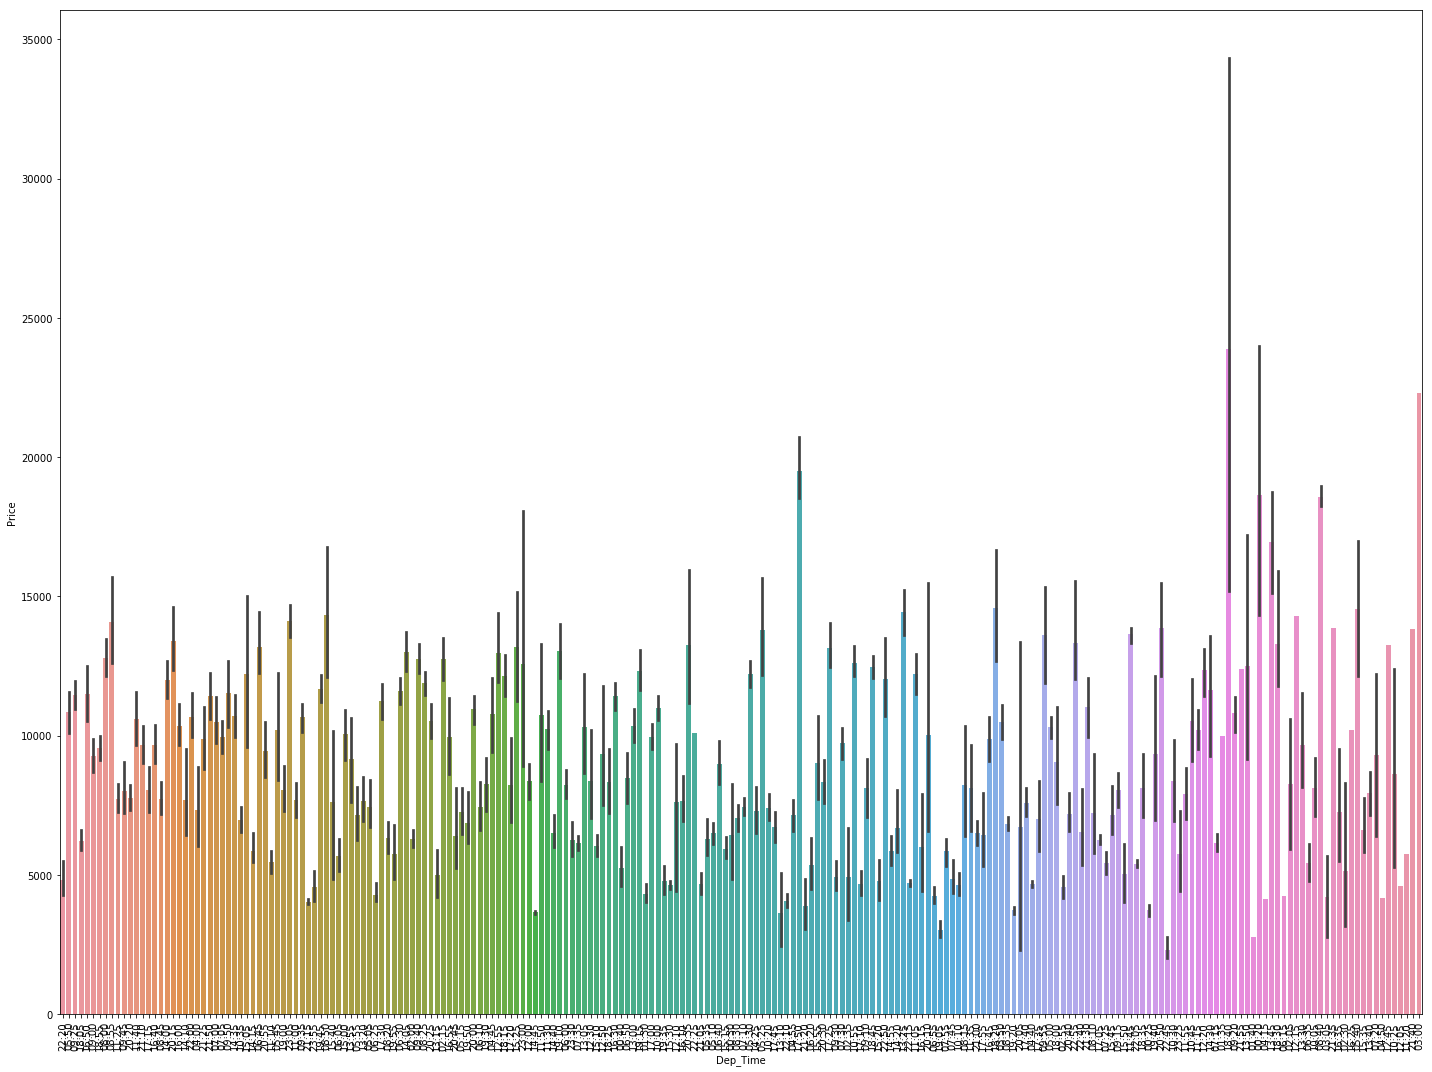

In [1210]:
plt.figure(figsize=(20,15))
sns.barplot(df_train.Dep_Time,df_train.Price)
plt.xticks(rotation=90)
plt.tight_layout()

At 16:40 the flight Price are high.

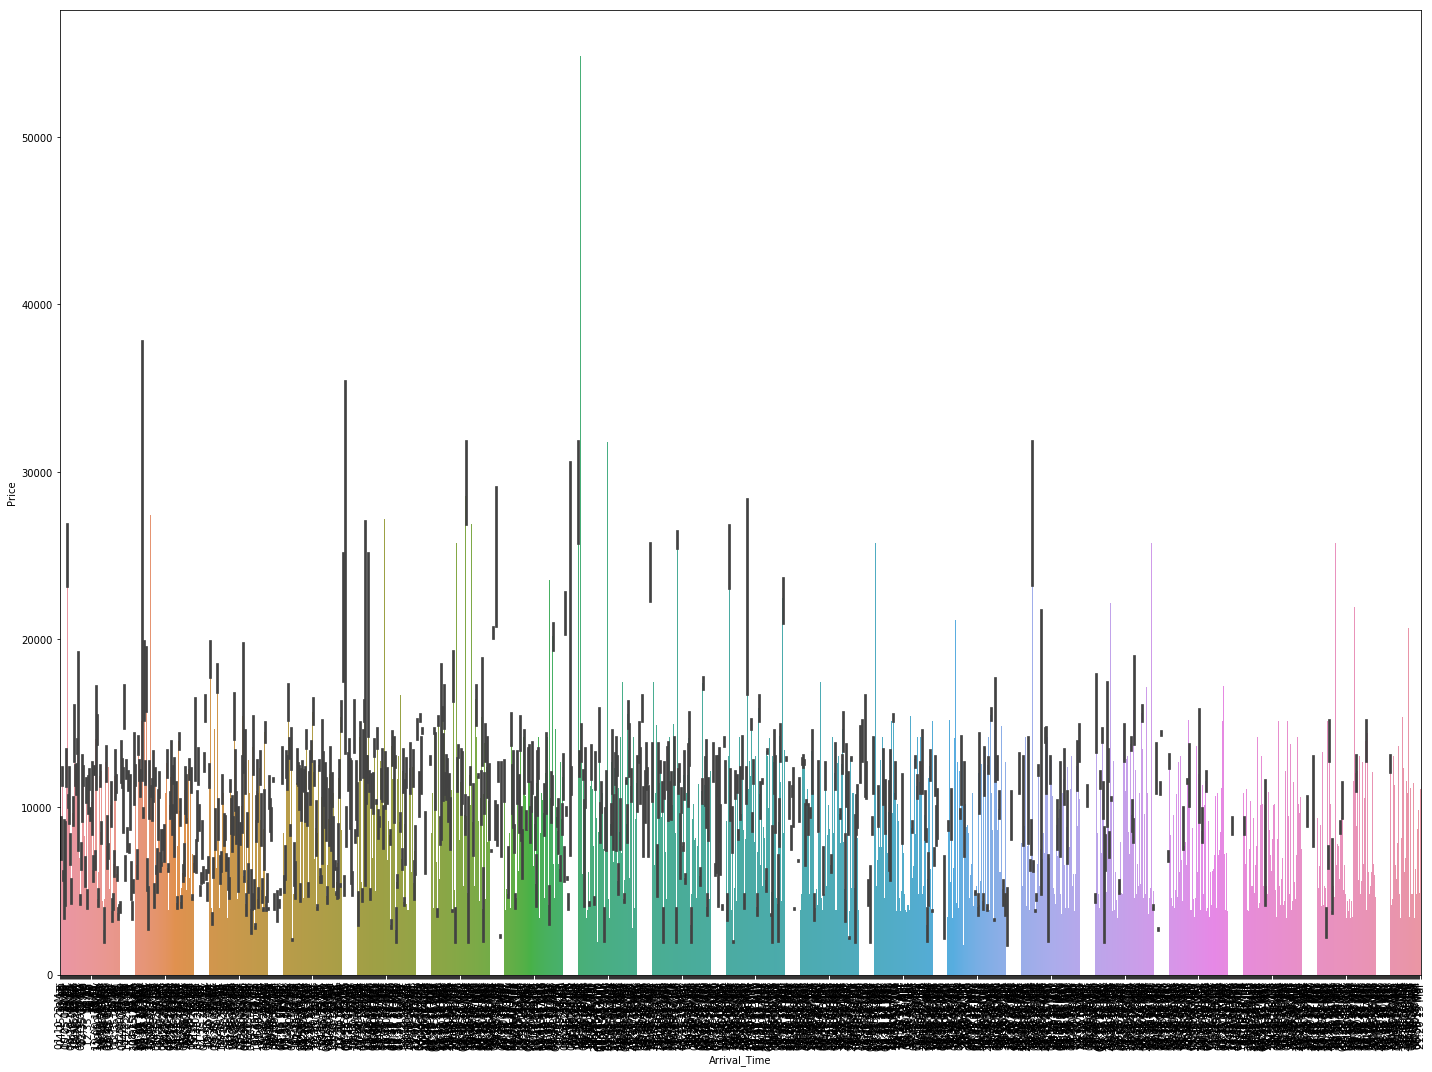

In [1211]:
plt.figure(figsize=(20,15))
sns.barplot(df_train.Arrival_Time,df_train.Price)
plt.xticks(rotation=90)
plt.tight_layout()

Showing arrivall time v/s Price  graph.

In [1212]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

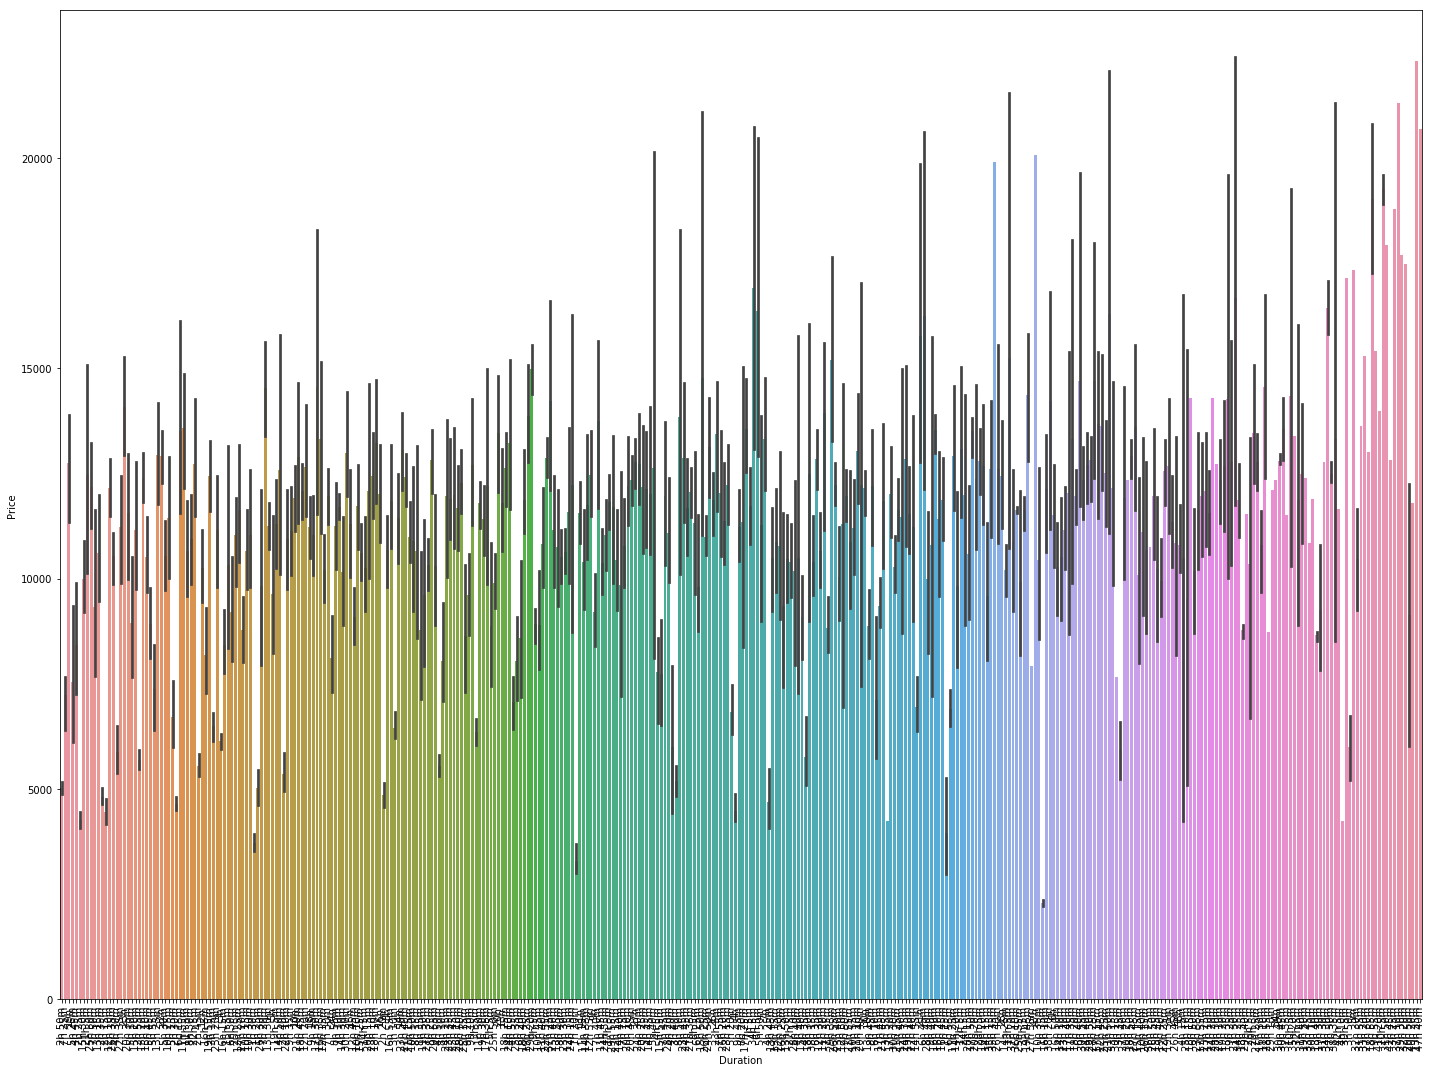

In [1213]:
plt.figure(figsize=(20,15))
sns.barplot(df_train.Duration,df_train.Price)
plt.xticks(rotation=90)
plt.tight_layout()

Showing Duration time v/s Price graph.

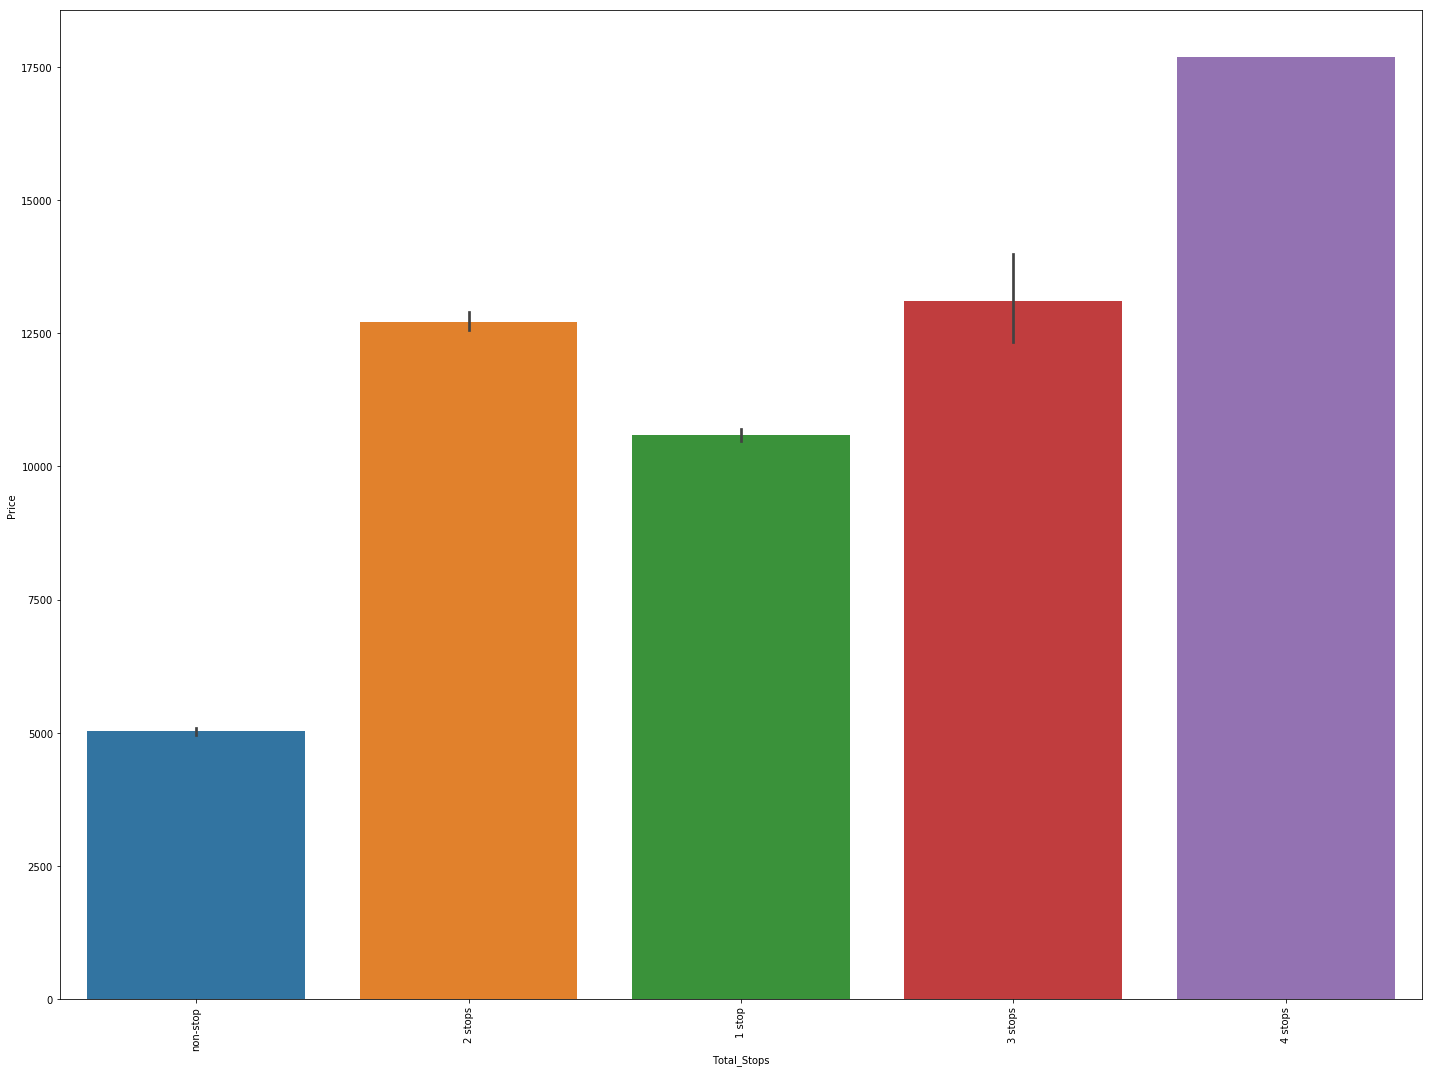

In [1214]:
plt.figure(figsize=(20,15))
sns.barplot(df_train.Total_Stops,df_train.Price)
plt.xticks(rotation=90)
plt.tight_layout()

more the the stops higher the Price for flights.

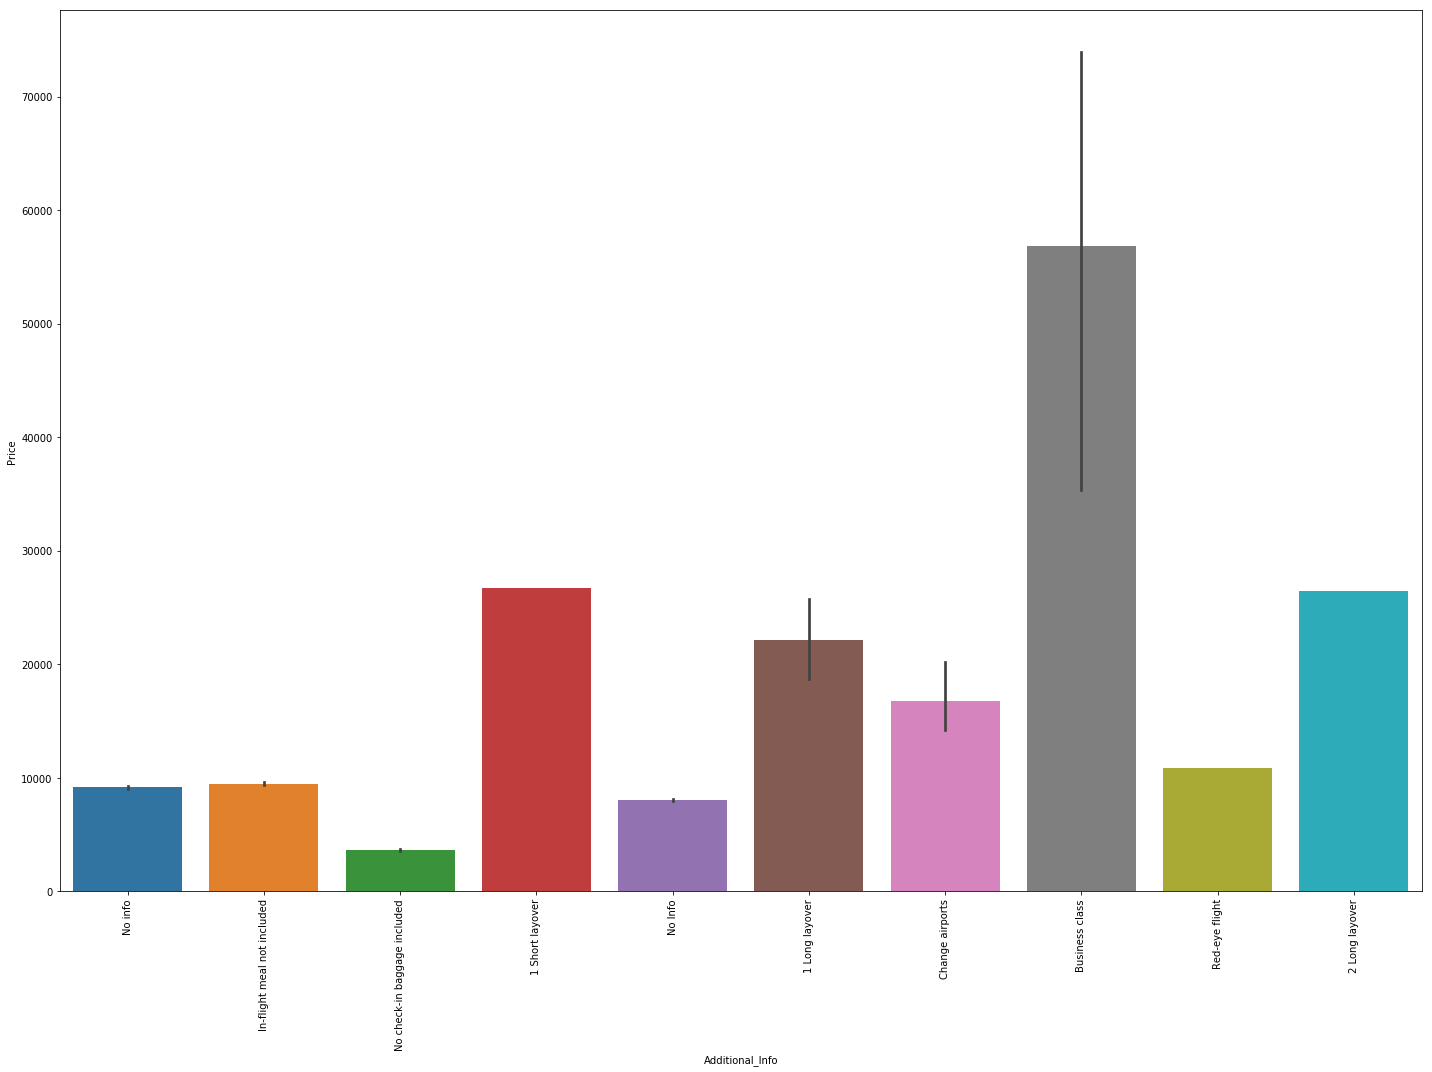

In [1215]:
plt.figure(figsize=(20,15))
sns.barplot(df_train.Additional_Info,df_train.Price)
plt.xticks(rotation=90)
plt.tight_layout()

the addtional info that has Bussiness Class tickets has highest Price for flights.

From above barplot i didn't get much indo for Route, Arrival_Time, Distination_time,DateOfJourney and Duration.

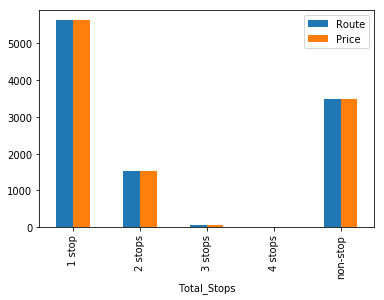

In [1216]:
df_train.groupby(df_train["Total_Stops"])["Route","Price"].count().plot(kind='bar')

The route with 1 stop are greater than 5000 flights.

the route with 2 stop are greater than 1000 flights.

the route without any stopage are grater than 3000 flights.

While the route for 3 stops and 4 stopage has minimum flights.

In [1217]:
## Transforming New columns for DateOfJourney,Dep_time,Arrival_Time,Duration


df_train['Journey_month']= pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.month
df_train['Journey_day']= pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.day
#Two new features transformed through DataOfJourney


df_train["Dep_hour"]= pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train["Dep_min"]= pd.to_datetime(df_train['Dep_Time']).dt.minute
#Two new features transformed through Dep_Time.



arr_time=df_train["Arrival_Time"].tolist()
arr_t=[]
[arr_t.append(i[:5]) for i in arr_time]
df_train['Arrival_Time']=arr_t
df_train.head()
df_train["Arr_hour"]= pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train["Arr_min"]= pd.to_datetime(df_train['Arrival_Time']).dt.minute
#Two new features transformed through Arrival_Time as tihis column is also transformed.


df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


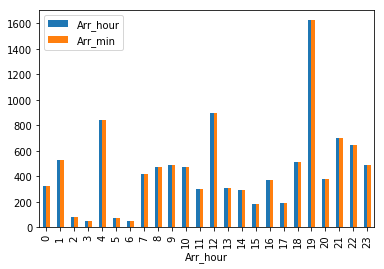

In [1218]:
df_train.groupby(df_train["Arr_hour"])["Arr_hour","Arr_min"].count().plot(kind='bar')

After 7:00 p.m. most flights arrived to destination place.

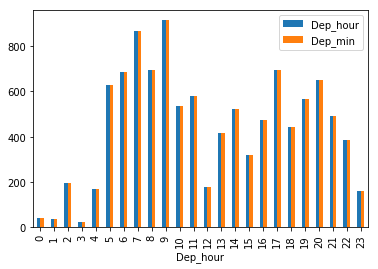

In [1219]:
df_train.groupby(df_train["Dep_hour"])["Dep_hour","Dep_min"].count().plot(kind='bar')

In [1220]:
df_train['Duration']=pd.to_timedelta(df_train.Duration)

df_train['Duration_min']=df_train.Duration.dt.total_seconds()//60

In [1221]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,02:50:00,non-stop,No info,3897,3,24,22,20,1,10,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,07:25:00,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19:00:00,2 stops,No info,13882,6,9,9,25,4,25,1140.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,05:25:00,1 stop,No info,6218,5,12,18,5,23,30,325.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,04:45:00,1 stop,No info,13302,3,1,16,50,21,35,285.0


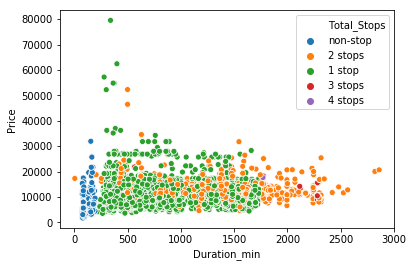

In [1222]:
sns.scatterplot(df_train['Duration_min'],df_train['Price'],hue=df_train['Total_Stops'])

Higher the duration with their respect to no. of stops  higher the Price.

for stopage 1 their seems to be outliers.

In [1223]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_month      0
Journey_day        0
Dep_hour           0
Dep_min            0
Arr_hour           0
Arr_min            0
Duration_min       0
dtype: int64

there is only one null values that we have to drop.

And columns that we transformed from like DateOfJourney,Duration,Dep_Time,Arrival_Time that we should drop. As we gather the information from these columns And also there maybe some outliers that we seen in the scatterplot we have to analyse that.


We have to transformed columns for Test dataset too.

In [1224]:
df_train.dropna(inplace=True)
df_train.drop(columns=['Date_of_Journey',"Dep_Time","Arrival_Time","Duration"],inplace=True)

In [1225]:
## Transforming Columns for Test Dataset


## Transforming New columns for DateOfJourney,Dep_time,Arrival_Time,Duration for Test Dataset.


df_test['Journey_month']= pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.month
df_test['Journey_day']= pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
#Two new features transformed through DataOfJourney


df_test["Dep_hour"]= pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test["Dep_min"]= pd.to_datetime(df_test['Dep_Time']).dt.minute
#Two new features transformed through Dep_Time.



arr_time=df_test["Arrival_Time"].tolist()
arr_t=[]
[arr_t.append(i[:5]) for i in arr_time]
df_test['Arrival_Time']=arr_t
df_test["Arr_hour"]= pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test["Arr_min"]= pd.to_datetime(df_test['Arrival_Time']).dt.minute
#Two new features transformed through Arrival_Time as tihis column is also transformed.



df_test['Duration']=pd.to_timedelta(df_test.Duration)

df_test['Duration_min']=df_test.Duration.dt.total_seconds()//60

df_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10:55:00,1 stop,No info,6,6,17,30,4,25,655.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,04:00:00,1 stop,No info,5,12,6,20,10,20,240.0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23:45:00,1 stop,In-flight meal not included,5,21,19,15,19,0,1425.0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13:00:00,1 stop,No info,5,21,8,0,21,0,780.0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,02:50:00,non-stop,No info,6,24,23,55,2,45,170.0


In [1226]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_month      0
Journey_day        0
Dep_hour           0
Dep_min            0
Arr_hour           0
Arr_min            0
Duration_min       0
dtype: int64

No missing data in test Dataset.

In [1227]:
df_test.drop(columns=['Date_of_Journey',"Dep_Time","Arrival_Time","Duration"],inplace=True)

In [1228]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
Airline            10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
Journey_month      10682 non-null int64
Journey_day        10682 non-null int64
Dep_hour           10682 non-null int64
Dep_min            10682 non-null int64
Arr_hour           10682 non-null int64
Arr_min            10682 non-null int64
Duration_min       10682 non-null float64
dtypes: float64(1), int64(7), object(6)
memory usage: 1.2+ MB


#### Transforming Categorical Features.

##### Fot Training Dataset.

In [1229]:
print(f"Airline:\n--------------\n{df_train['Airline'].value_counts()}\nSource:\n--------------\n{df_train['Source'].value_counts()}\nDestination:\n--------------\n{df_train['Destination'].value_counts()}\nRoute:\n--------------\n{df_train['Route'].value_counts()}")

Airline:
--------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Source:
--------------
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Destination:
--------------
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
Route:
--------------
DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                    

In [1230]:
df_train['Airline']=df_train['Airline'].replace({"Jet Airways":0,"IndiGo":1,"Air India":2,"Multiple carriers":3,"SpiceJet":4,"Air Asia":5,"Vistara":6,"GoAir":7,"Multiple carriers Premium economy":8,"Vistara Premium economy":9,"Jet Airways Business":10,"Vistara Premium economy":11,"Trujet":12})

In [1231]:
encoder=LabelEncoder()
df_train['Source']=encoder.fit_transform(df_train.Source)
df_train['Destination']=encoder.fit_transform(df_train.Destination)
df_train['Route']=encoder.fit_transform(df_train.Route)

In [1232]:
print(f"Total_stops:\n--------------\n{df_train['Total_Stops'].value_counts()}\nAdditional_Info:\n--------------\n{df_train['Additional_Info'].value_counts()}")

Total_stops:
--------------
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
Additional_Info:
--------------
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


In [1233]:
df_train.Additional_Info=df_train.Additional_Info.replace({"No Info":0,"No info":0,"In-flight meal not included":1,"No check-in baggage included":2,"1 Long layover":3,"Change airports":4,"Business class":5,"1 Short layover":6,"Red-eye flight":7,"2 Long layover":8})
df_train.Total_Stops=df_train.Total_Stops.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [1234]:
df_train['Additional_Info'].value_counts()

0    8347
1    1982
2     320
3      19
4       7
5       4
7       1
6       1
8       1
Name: Additional_Info, dtype: int64

In [1235]:
print(f"Airline:\n--------------\n{df_test['Airline'].value_counts()}\nSource:\n--------------\n{df_test['Source'].value_counts()}\nDestination:\n--------------\n{df_test['Destination'].value_counts()}\nRoute:\n--------------\n{df_test['Route'].value_counts()}")

Airline:
--------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
Source:
--------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Destination:
--------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
Route:
--------------
DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR                            172
BOM → HY

In [1236]:
print(f"Total_stops:\n--------------\n{df_test['Total_Stops'].value_counts()}\nAdditional_Info:\n--------------\n{df_test['Additional_Info'].value_counts()}")

Total_stops:
--------------
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64
Additional_Info:
--------------
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64


###### For test Dataset.

In [1237]:
df_test['Airline']=df_test['Airline'].replace({"Jet Airways":0,"IndiGo":1,"Air India":2,"Multiple carriers":3,"SpiceJet":4,"Air Asia":5,"Vistara":6,"GoAir":7,"Multiple carriers Premium economy":8,"Vistara Premium economy":9,"Jet Airways Business":10})

In [1238]:

df_test['Source']=encoder.fit_transform(df_test.Source)
df_test['Destination']=encoder.fit_transform(df_test.Destination)
df_test['Route']=encoder.fit_transform(df_test.Route)


In [1239]:
df_test.Total_Stops=df_test.Total_Stops.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})
df_test.Additional_Info=df_test.Additional_Info.replace({"No Info":0,"No info":0,"In-flight meal not included":1,"No check-in baggage included":2,"1 Long layover":3,"Change airports":4,"Business class":5})

In [1240]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
0,0,2,1,76,1,0,6,6,17,30,4,25,655.0
1,1,3,0,65,1,0,5,12,6,20,10,20,240.0
2,0,2,1,76,1,1,5,21,19,15,19,0,1425.0
3,3,2,1,76,1,0,5,21,8,0,21,0,780.0
4,5,0,2,16,0,0,6,24,23,55,2,45,170.0


In [1241]:
df_train.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,1.727298,1.952256,1.436154,74.820165,0.824190,0.257255,9087.214567,4.708575,13.509081,12.491013,24.409287,13.349186,24.690601,643.020502
std,1.878797,1.177276,1.474845,36.729039,0.675229,0.537609,4611.548810,1.164408,8.479363,5.748820,18.767801,6.859317,16.506808,507.830133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,2.000000,0.000000,48.000000,0.000000,0.000000,5277.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000,170.000000
50%,1.000000,2.000000,1.000000,73.000000,1.000000,0.000000,8372.000000,5.000000,12.000000,11.000000,25.000000,14.000000,25.000000,520.000000
75%,3.000000,3.000000,2.000000,104.000000,1.000000,0.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,930.000000
max,12.000000,4.000000,5.000000,127.000000,4.000000,8.000000,79512.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000,2860.000000


Duration_min: The least value i.e. 5min that could not be possible. anf the max values showing 2860 min duration in flights that also seems me unproper.

Additional_Info: The data distribution for info is not distributed proper among the records.

Total_Stops,Route,Destination,Airline: In this these max Values doesn't seems to be properly distributed.



    

### Box-Plot

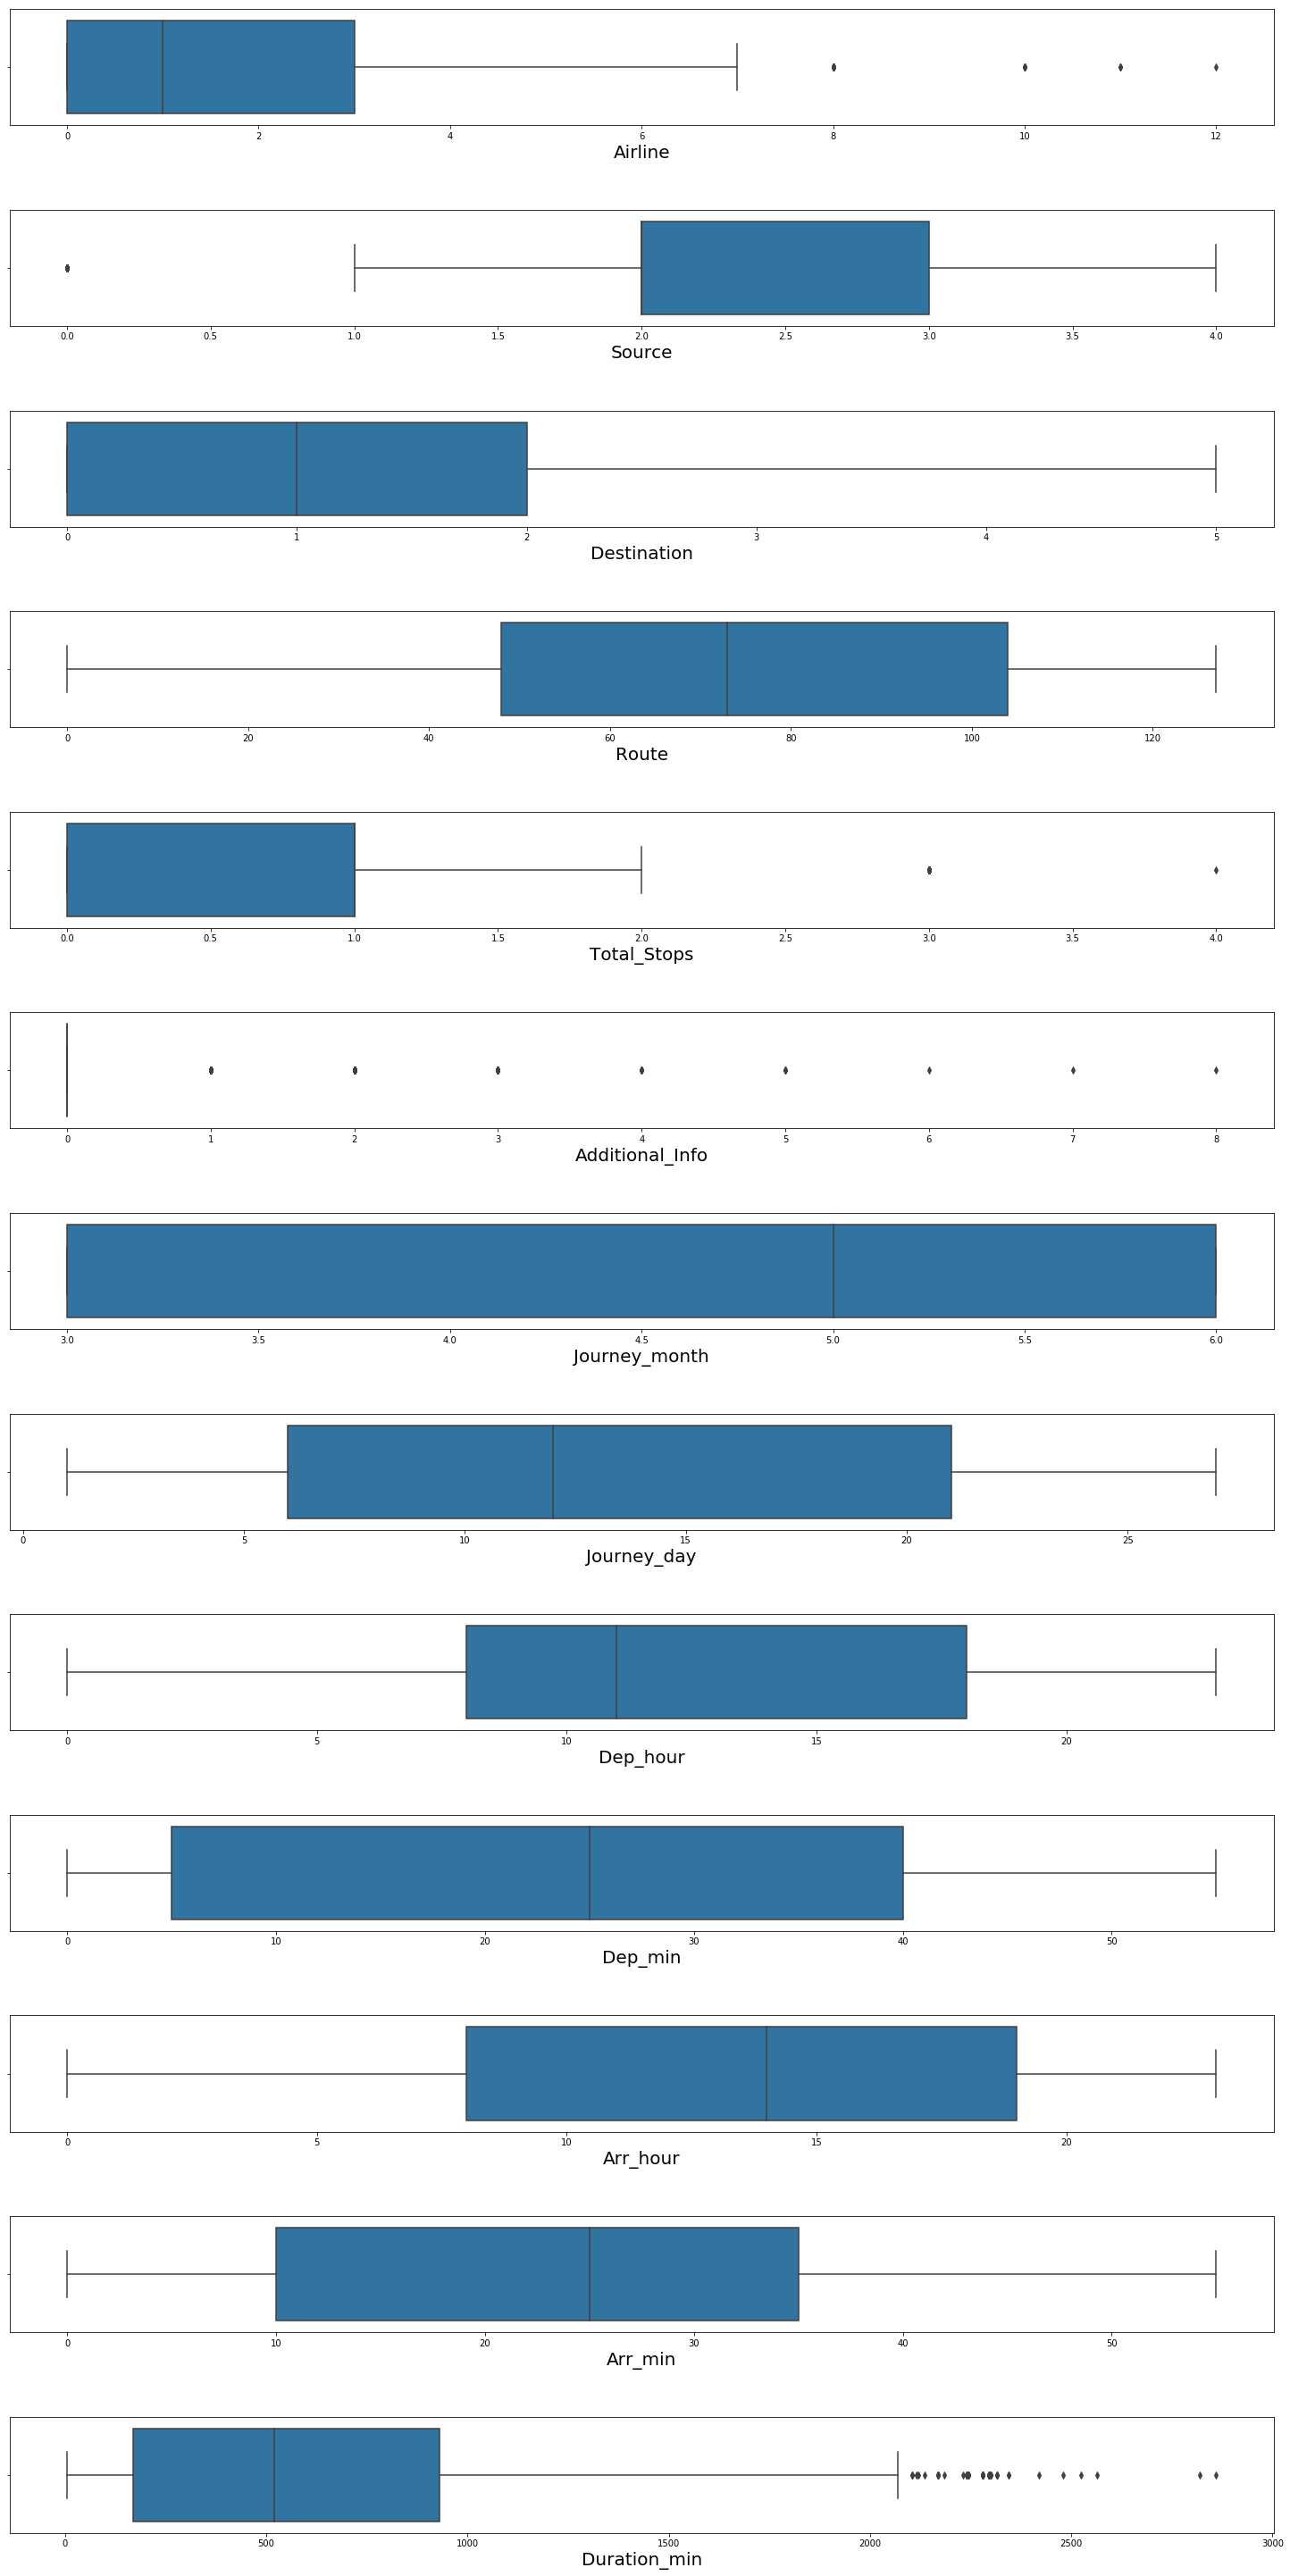

In [1242]:
plt.figure(figsize=(20,40))
plotno=1
for col in df_train.drop("Price",axis=1):
    if plotno<=13:
        ax=plt.subplot(13,1,plotno)
        sns.boxplot(df_train[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

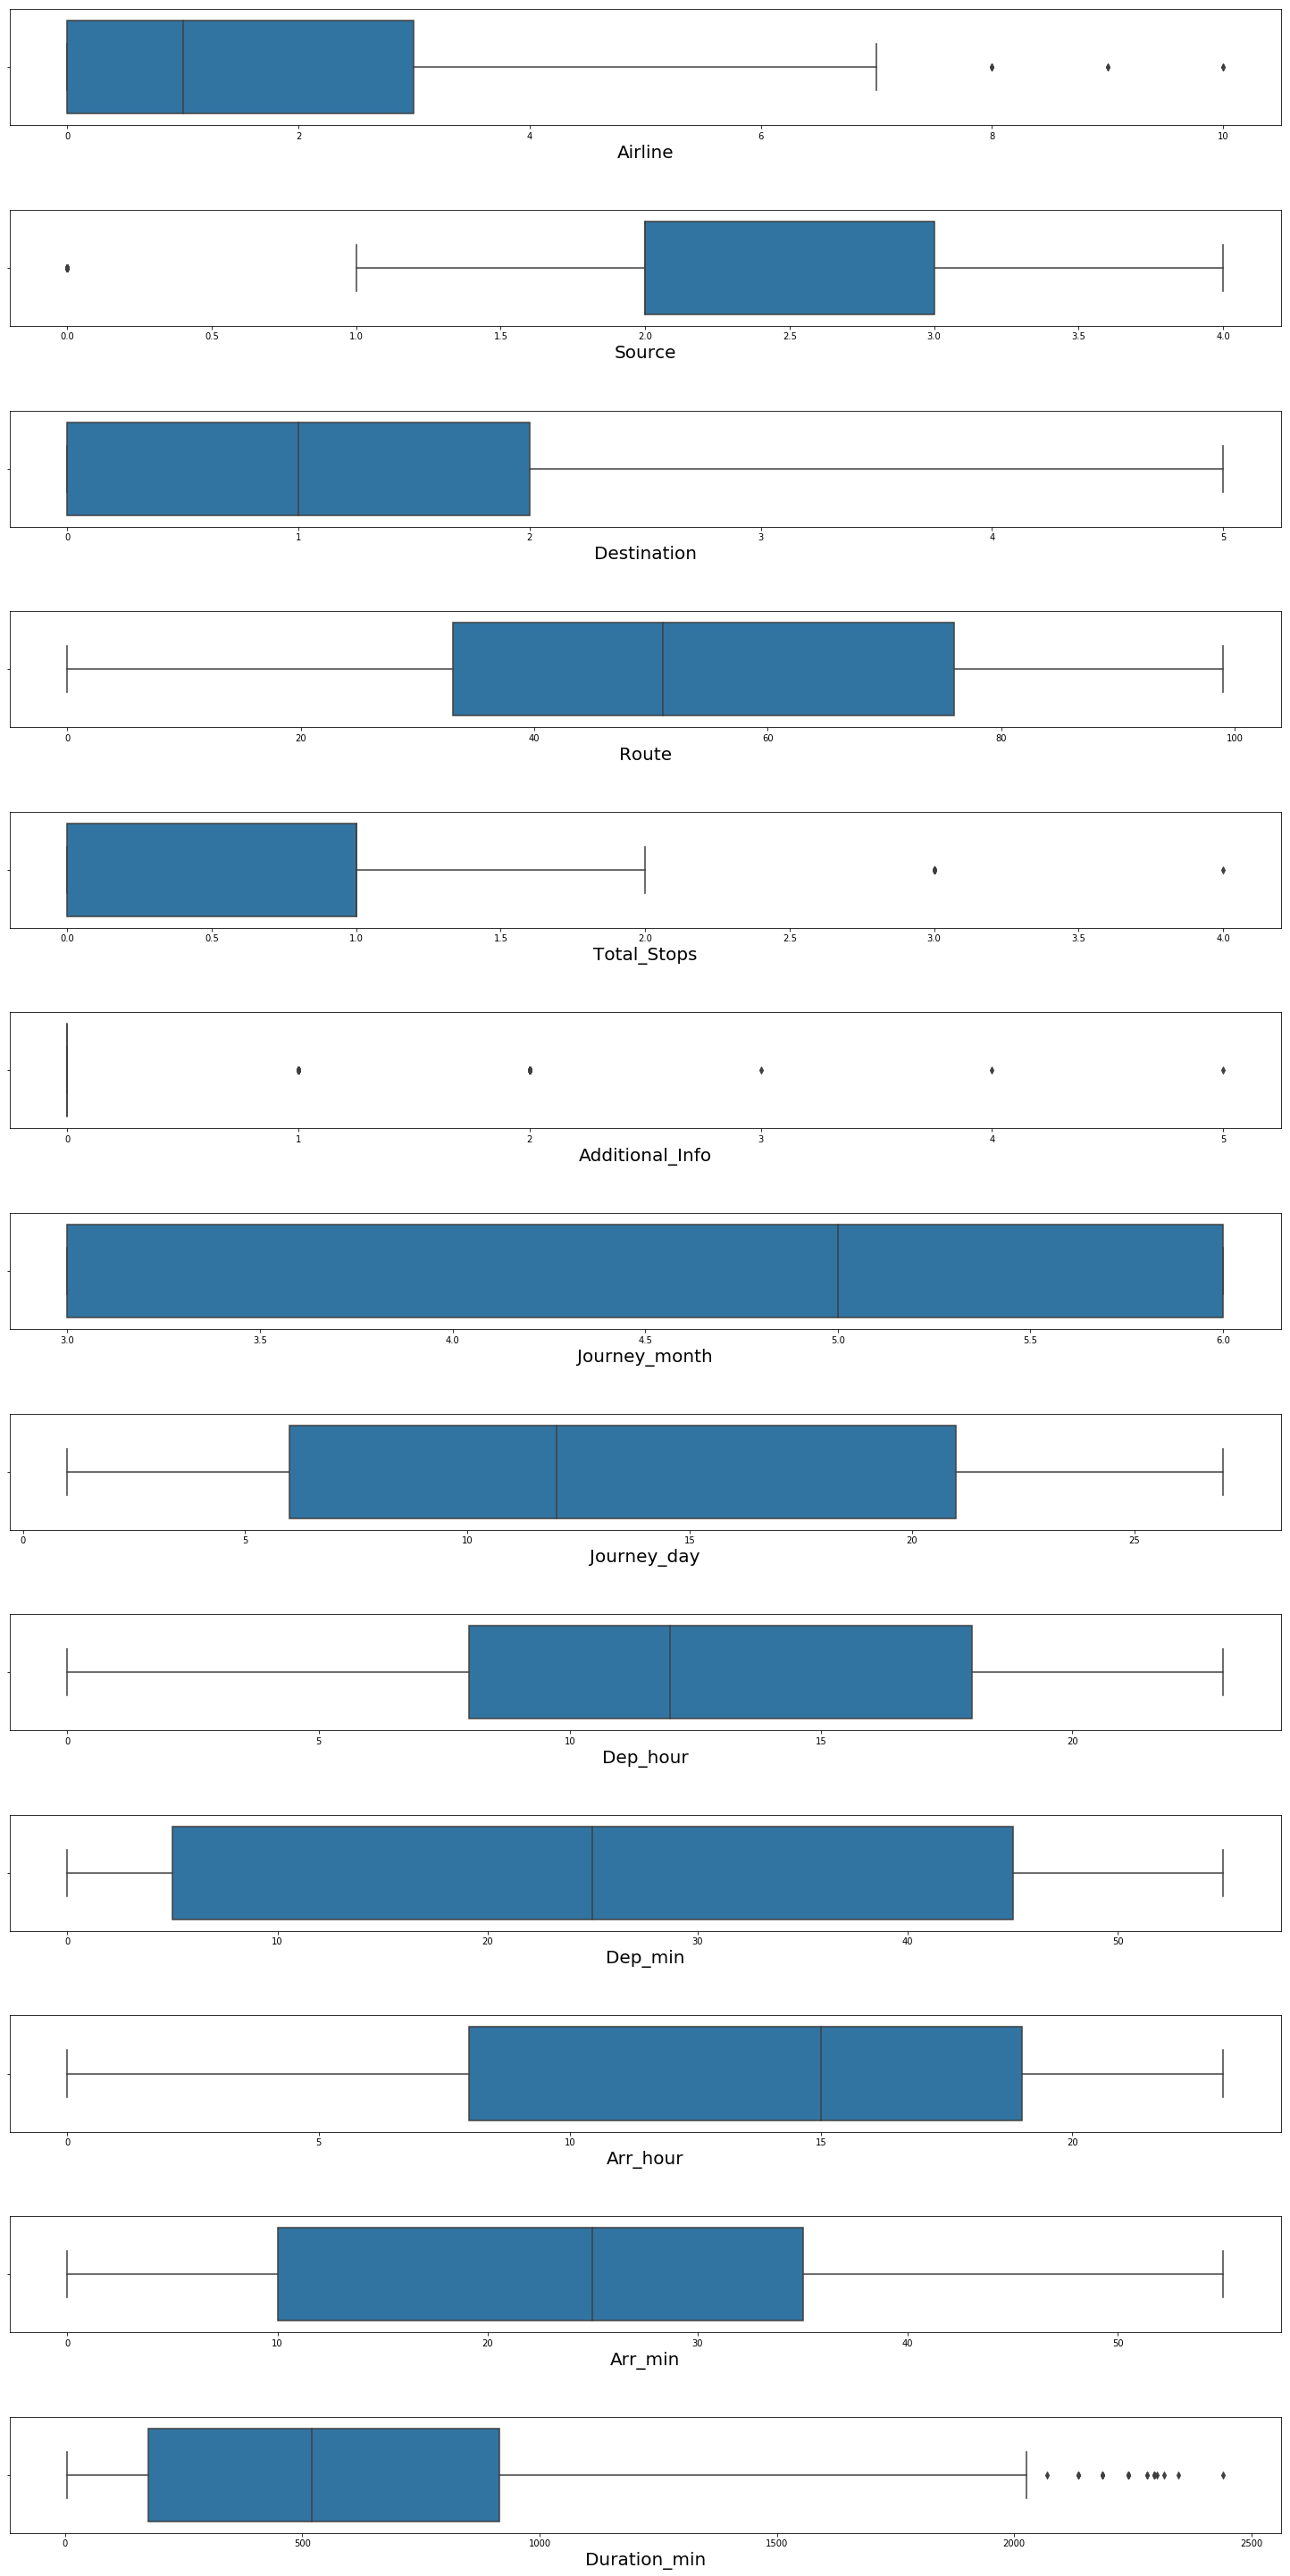

In [1243]:
plt.figure(figsize=(20,40))
plotno=1
for col in df_test:
    if plotno<=13:
        ax=plt.subplot(13,1,plotno)
        sns.boxplot(df_test[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

There are outliers in Airline,Total_Stops,Additional_Info,Duration_min in both train & test dataset.

### Distribution Plot

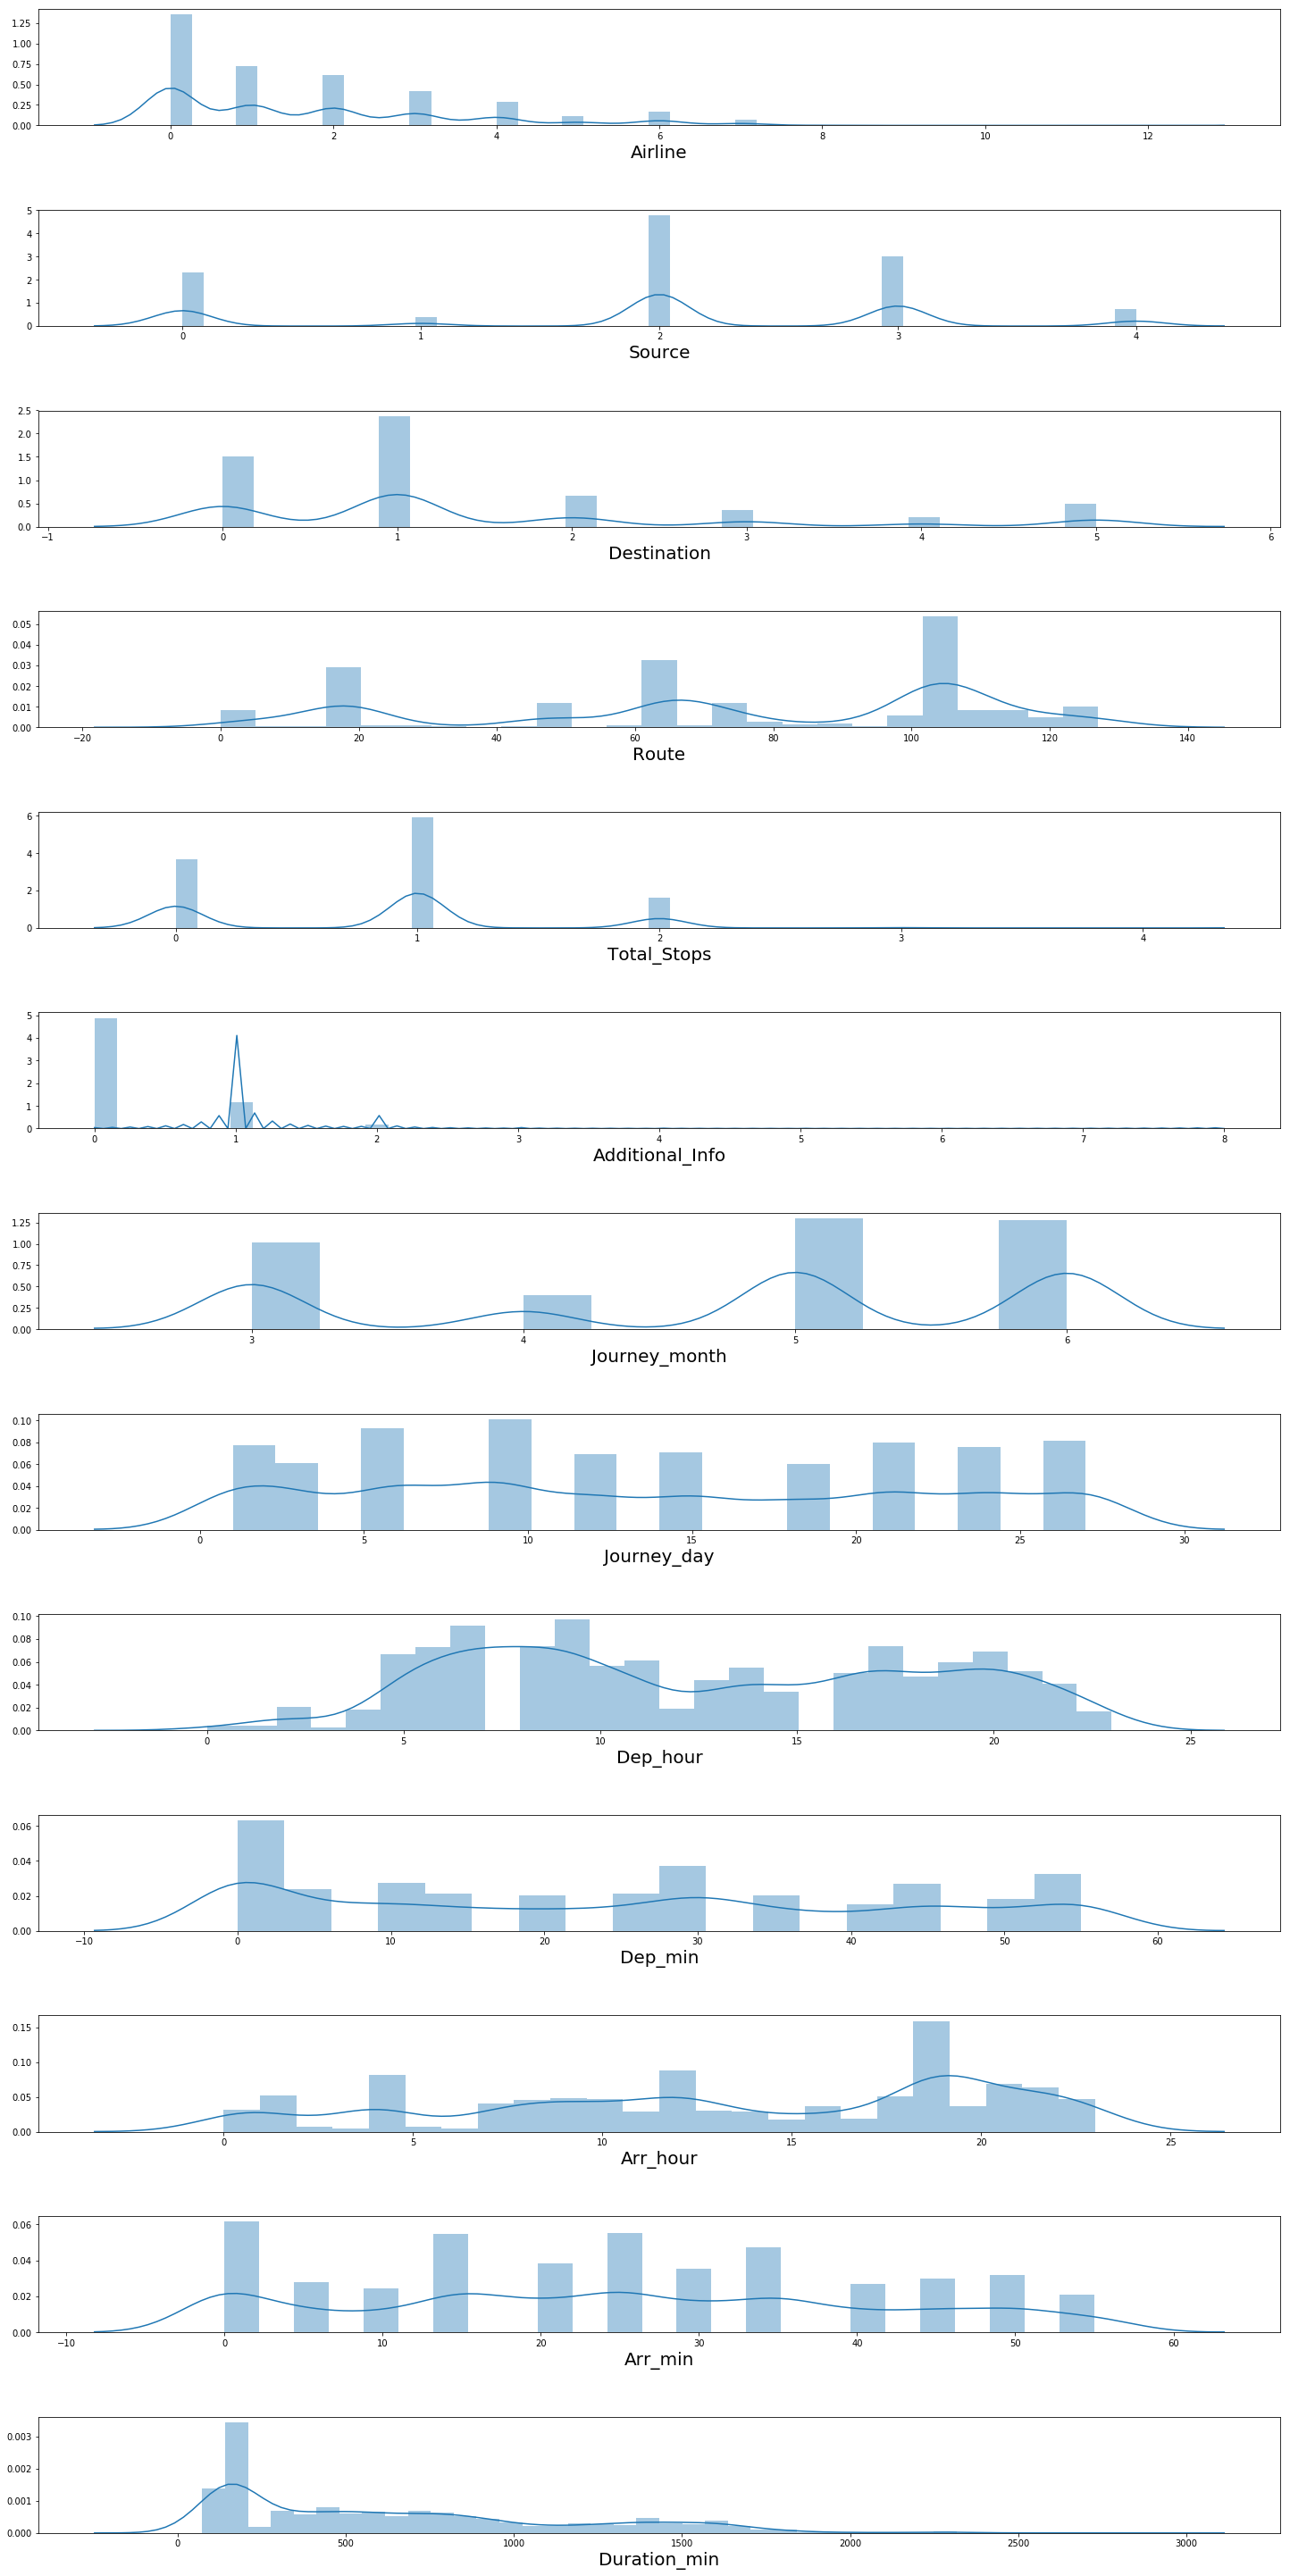

In [1244]:
plt.figure(figsize=(20,40))
plotno=1
for col in df_train.drop("Price",axis=1):
    if plotno<=13:
        ax=plt.subplot(13,1,plotno)
        sns.distplot(df_train[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

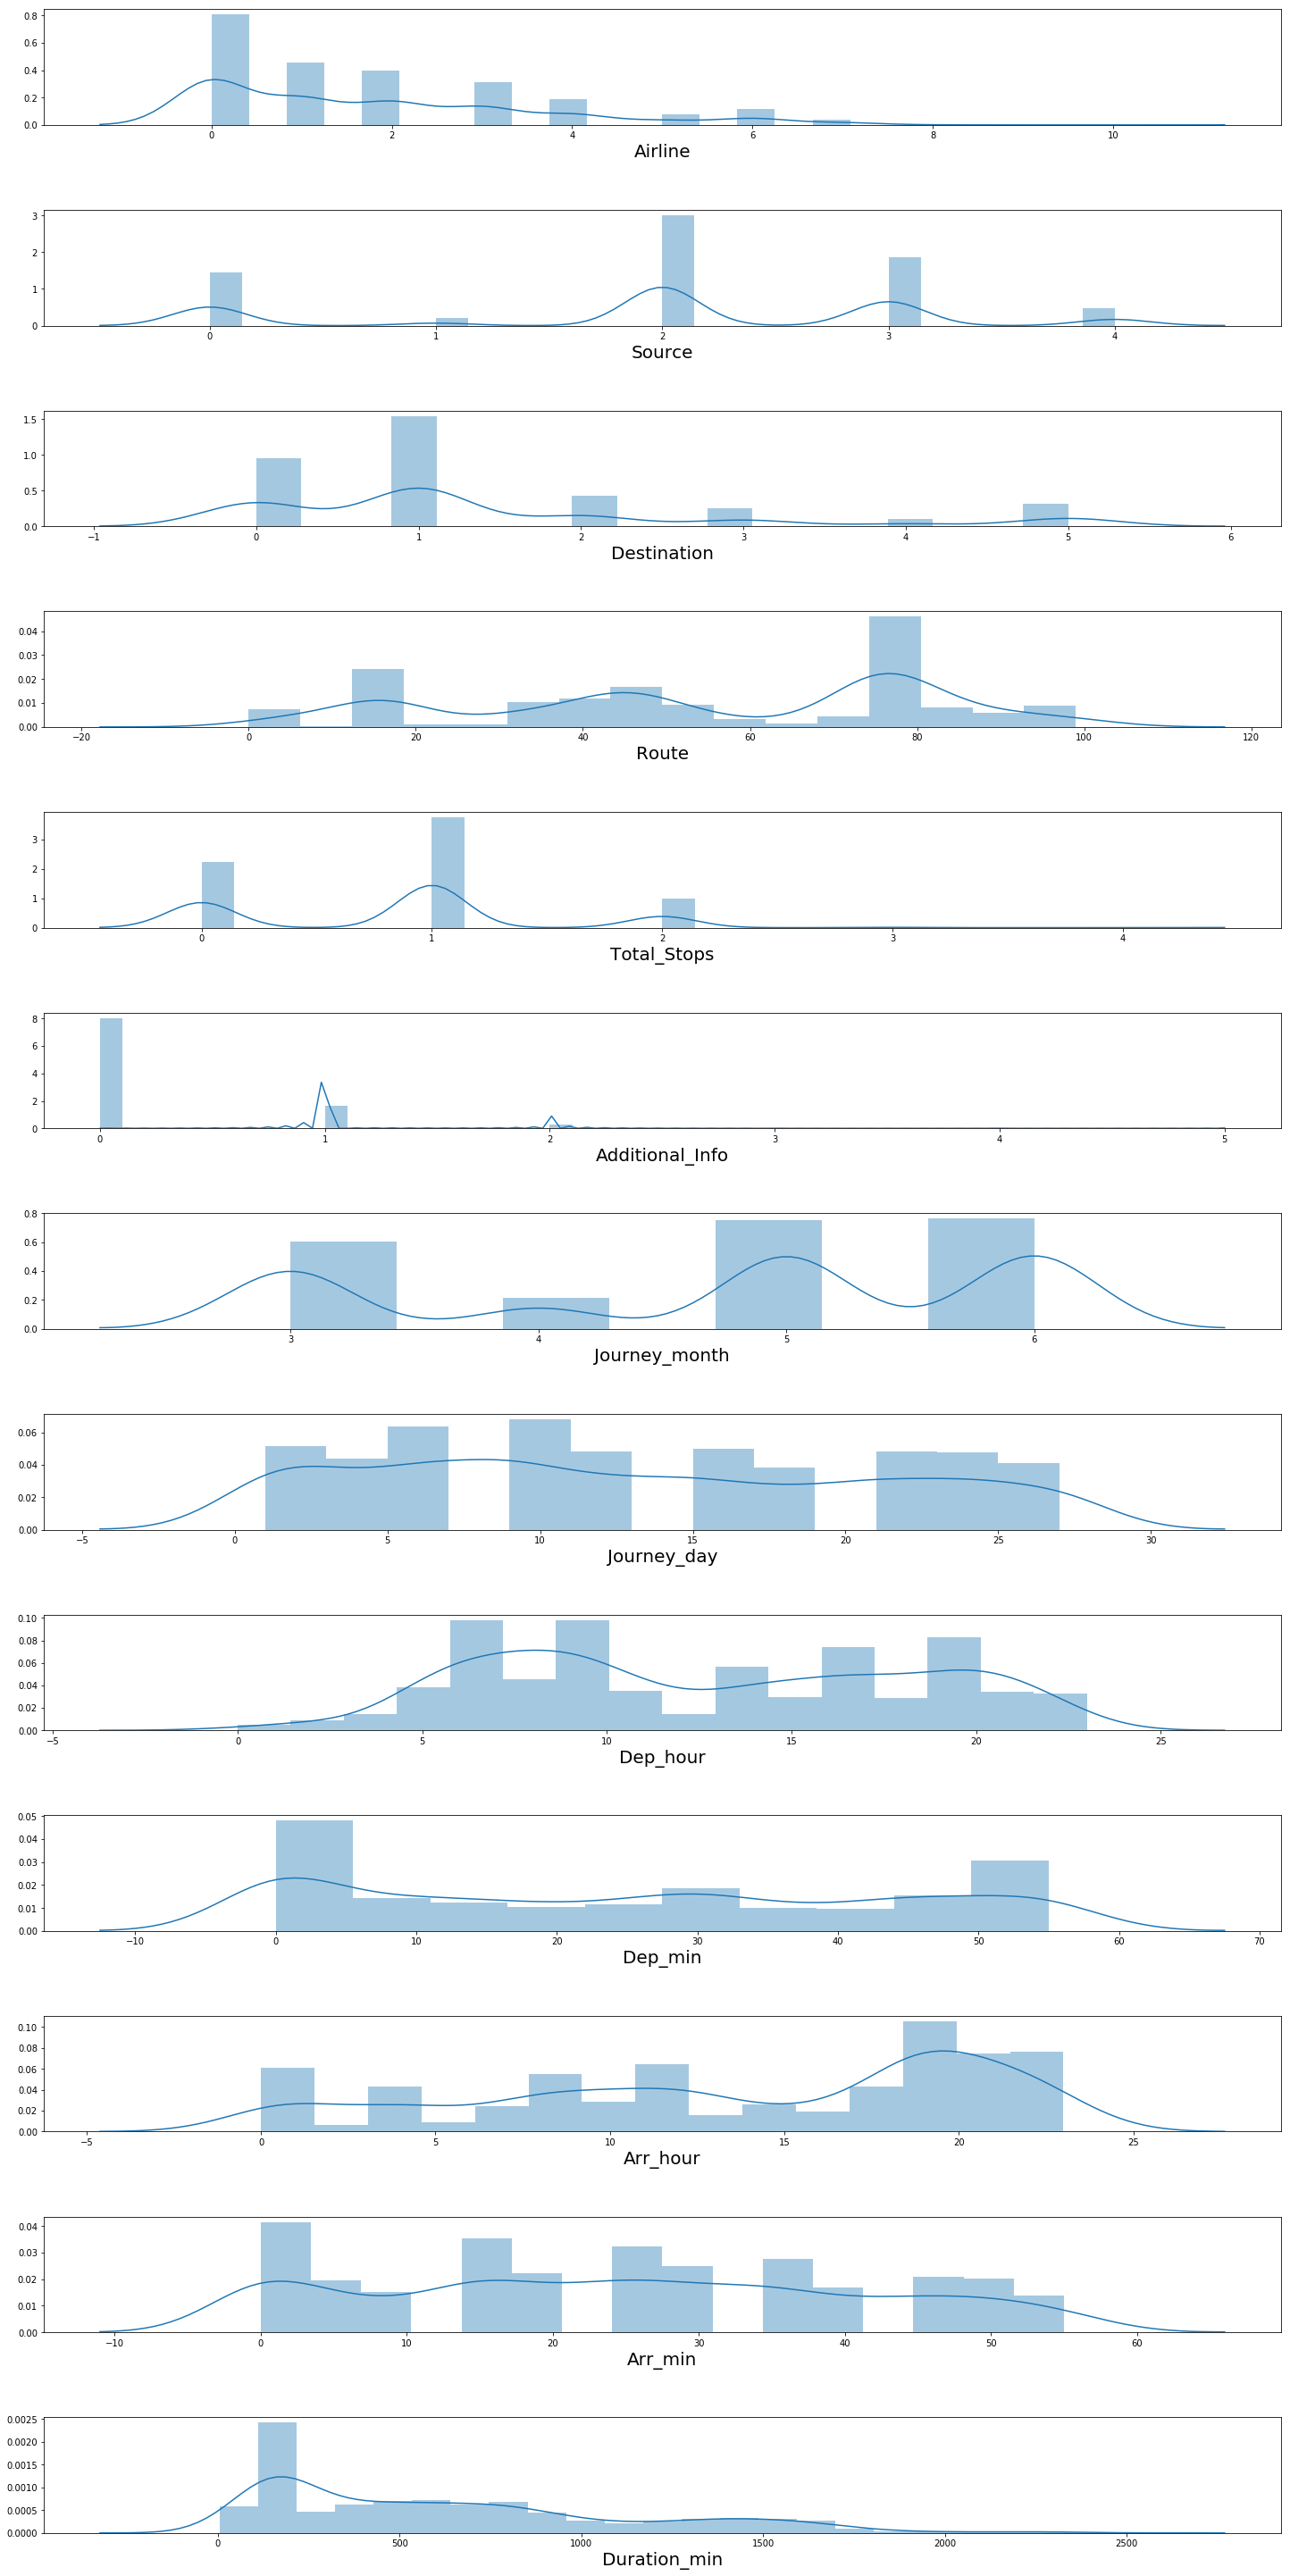

In [1245]:
plt.figure(figsize=(20,40))
plotno=1
for col in df_test:
    if plotno<=13:
        ax=plt.subplot(13,1,plotno)
        sns.distplot(df_test[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

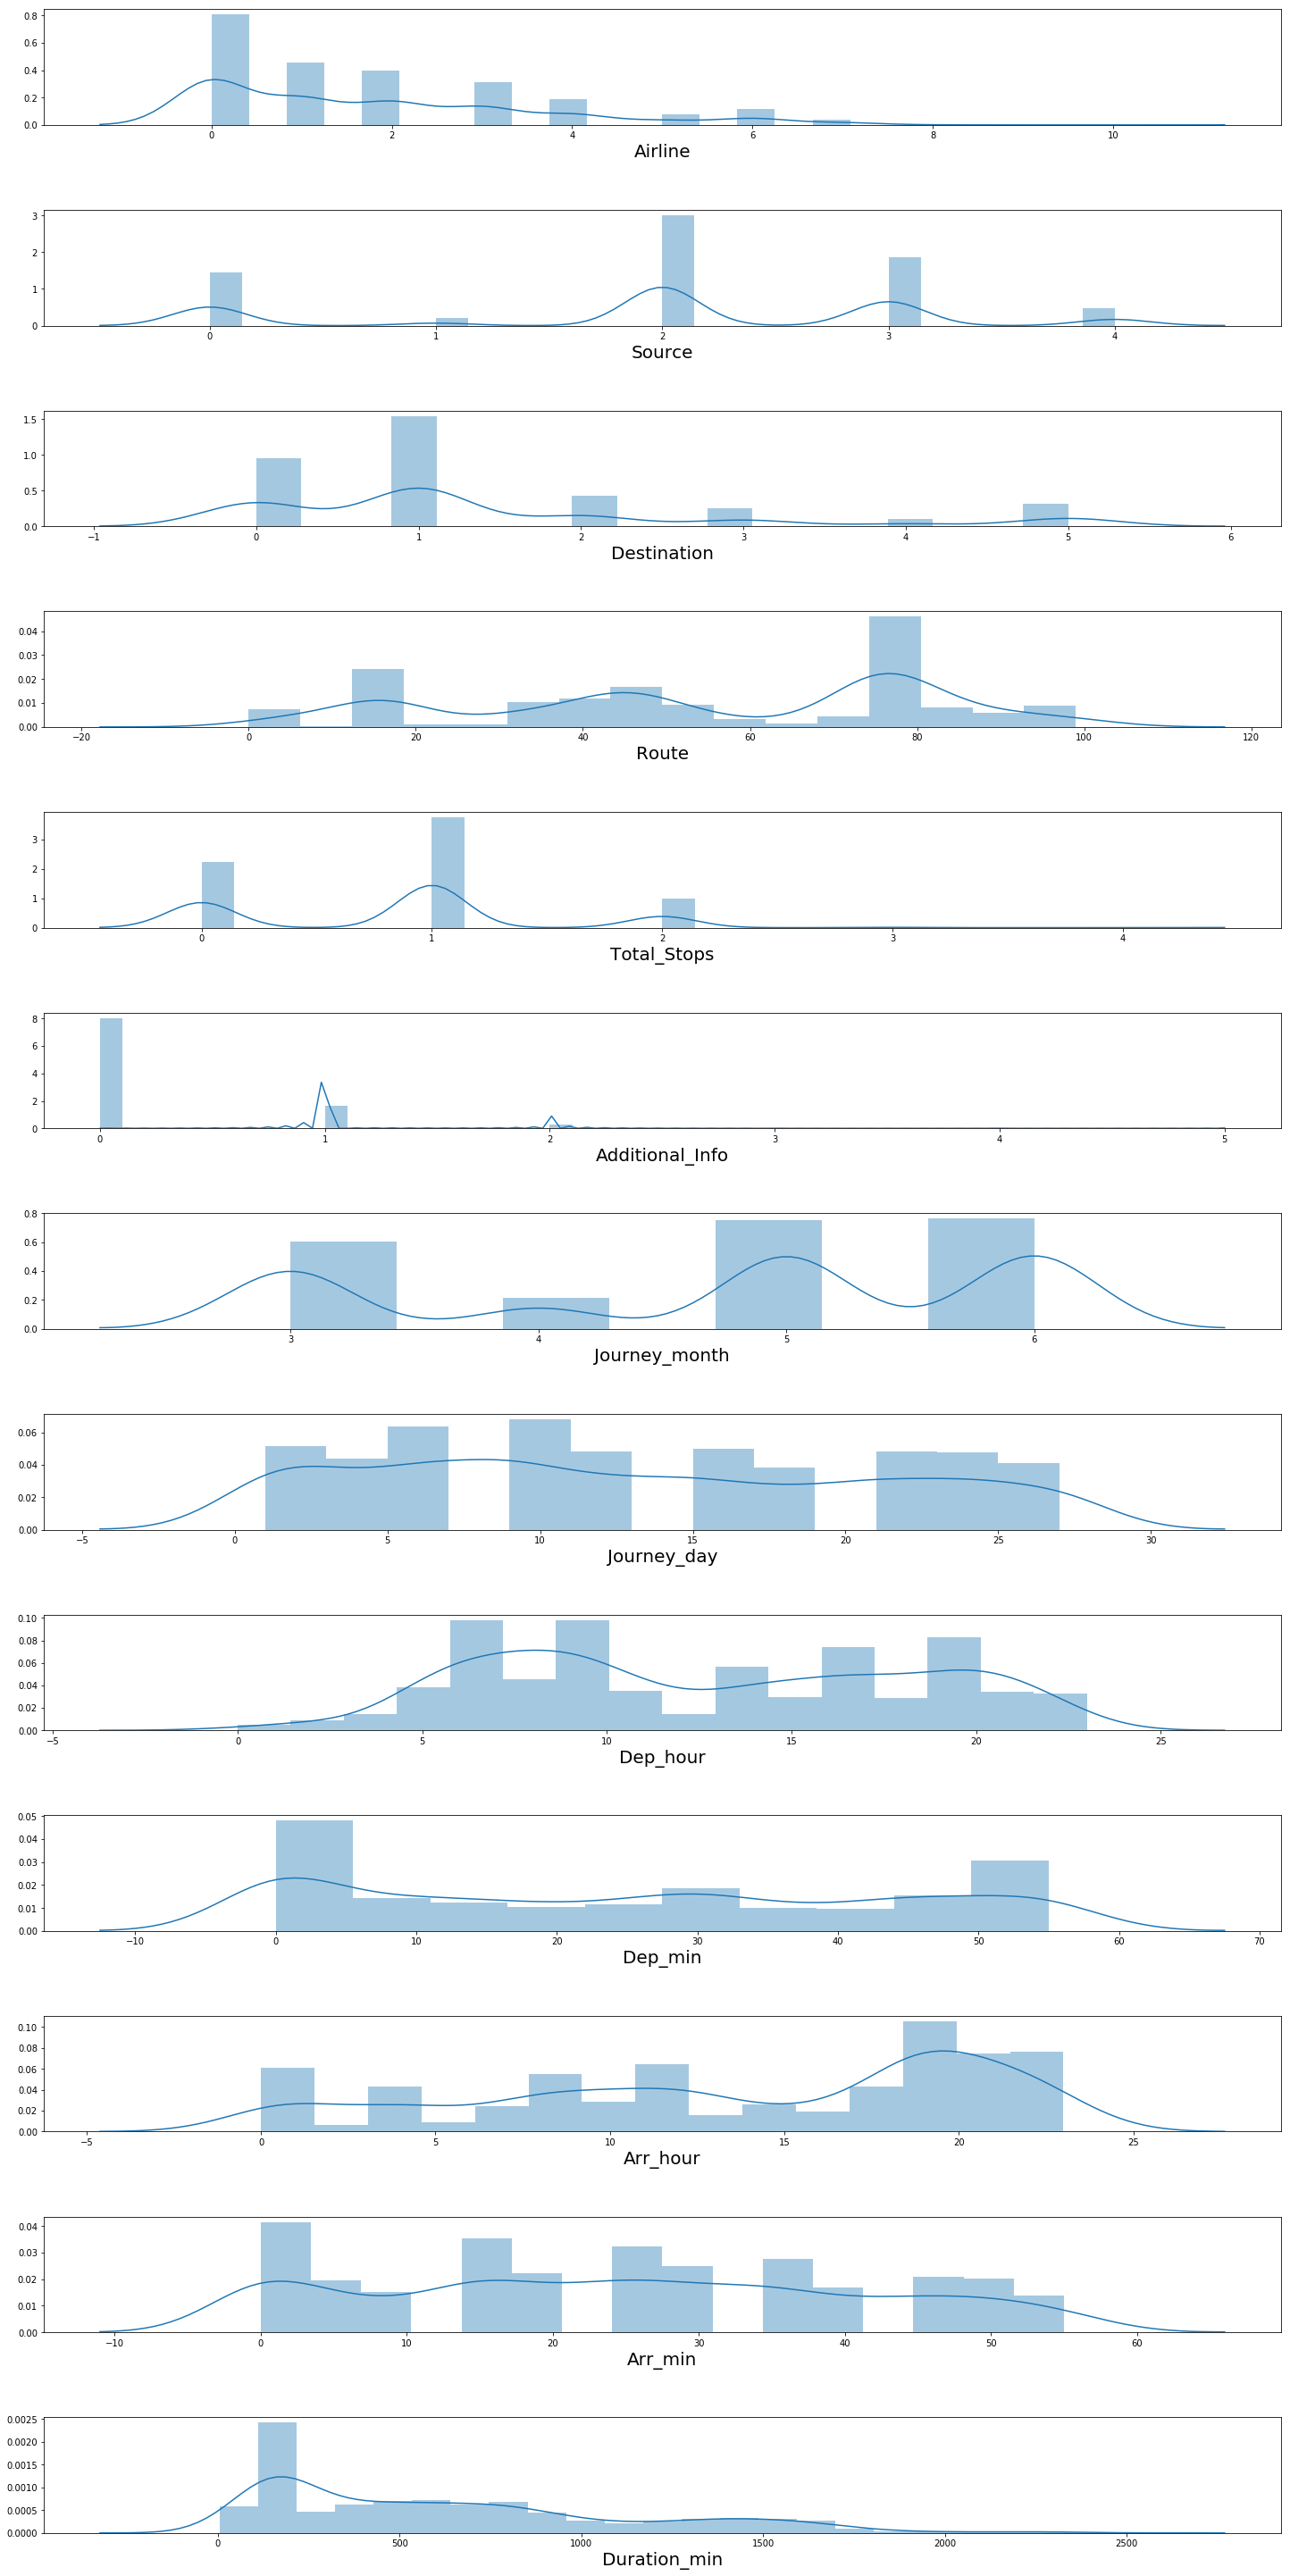

In [1246]:
plt.figure(figsize=(20,40))
plotno=1
for col in df_test:
    if plotno<=13:
        ax=plt.subplot(13,1,plotno)
        sns.distplot(df_test[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Airline,Destination,Additional_Info,Duration_min these are not are distributed normally in both dataset i.e. train & test dataset.

In [1247]:
df_train.skew()

Airline            1.109006
Source            -0.424023
Destination        1.244046
Route             -0.501911
Total_Stops        0.317109
Additional_Info    2.717764
Price              1.812405
Journey_month     -0.387409
Journey_day        0.118174
Dep_hour           0.112924
Dep_min            0.167234
Arr_hour          -0.370146
Arr_min            0.110945
Duration_min       0.861411
dtype: float64

Airline,Destination,Route,Additional_Info,Duration_min thses features are not in range of 0.5 to -0.5. So, they are skewed features that has to be further treated to normalize in train  dataset.

In [1248]:
df_test.skew()

Airline            1.018155
Source            -0.424997
Destination        1.263630
Route             -0.281807
Total_Stops        0.321364
Additional_Info    2.399470
Journey_month     -0.403700
Journey_day        0.199540
Dep_hour           0.093759
Dep_min            0.128515
Arr_hour          -0.443166
Arr_min            0.115267
Duration_min       0.896103
dtype: float64

Airline,Destination,Additional_Info,Duration_min thses features are not in range of 0.5 to -0.5. So, they are skewed features that has to be further treated to normalize in test  dataset.

In [1249]:
df_test.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.00000
mean,1.816548,1.961438,1.432797,54.356421,0.833396,0.227630,4.718458,12.915762,12.603519,24.891426,13.585174,24.558218,639.74167
std,1.887283,1.184328,1.467971,27.128993,0.672315,0.497033,1.170851,8.260824,5.686673,19.086522,7.040396,16.775436,502.18693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.00000
25%,0.000000,2.000000,0.000000,33.000000,0.000000,0.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000,175.00000
50%,1.000000,2.000000,1.000000,51.000000,1.000000,0.000000,5.000000,12.000000,12.000000,25.000000,15.000000,25.000000,520.00000
75%,3.000000,3.000000,2.000000,76.000000,1.000000,0.000000,6.000000,21.000000,18.000000,45.000000,19.000000,35.000000,915.00000
max,10.000000,4.000000,5.000000,99.000000,4.000000,5.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000,2440.00000


Seems to  be non-proper distributed and outliers too in features like Destination,Additional_Info,Duarion_min.


Destination,Additional_Info and Duration_min these features are not distributed normally.

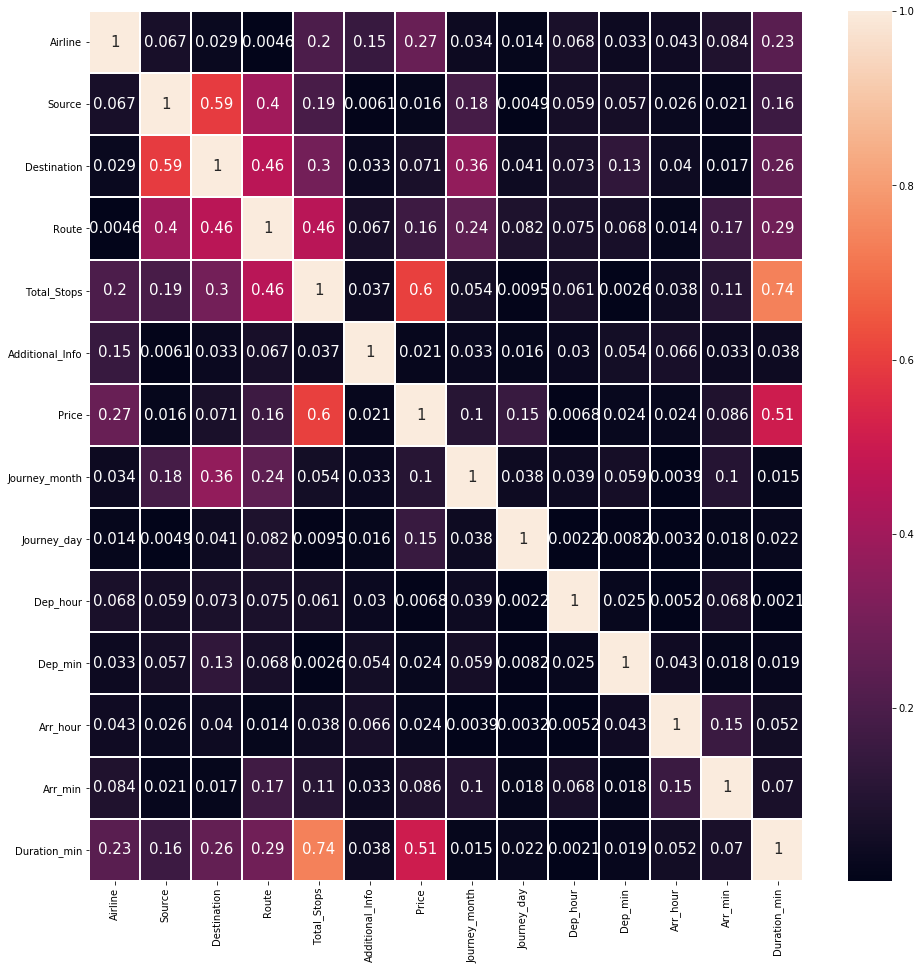

In [1250]:
plt.figure(figsize=(16,16))
sns.heatmap(df_train.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.show()

74% multi-Collinearity exists between Total_Stops & Duration_min.

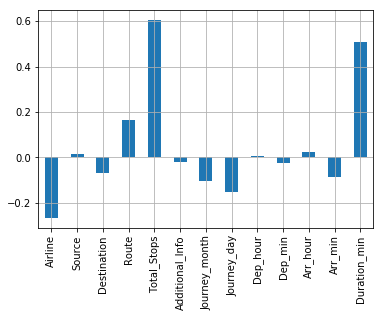

In [1251]:
df_train.drop(['Price'],axis=1).corrwith(df_train.Price).plot(kind='bar',grid=True)

Dep_hour,Dep_min,Arr_hour,Arr_min,Source these features are least to prdict the Price of Flights.

### Data Cleaning

In [1252]:
## Drop Duplicates.

df_train.drop_duplicates(inplace=True)
df_train.shape

(10460, 14)

In [1253]:
## Removing Outliers for train dataset and test dataset.

In [1254]:
Zscore=zscore(df_train[["Duration_min","Additional_Info","Total_Stops","Airline"]])
abs_Zscore=np.abs(Zscore)
filtered=(abs_Zscore<3).all(axis=1)
df_train=df_train[filtered]

In [1255]:
Zscore=zscore(df_test[["Duration_min","Additional_Info","Total_Stops","Airline"]])
abs_Zscore=np.abs(Zscore)
filtered=(abs_Zscore<3).all(axis=1)
df_test=df_test[filtered]

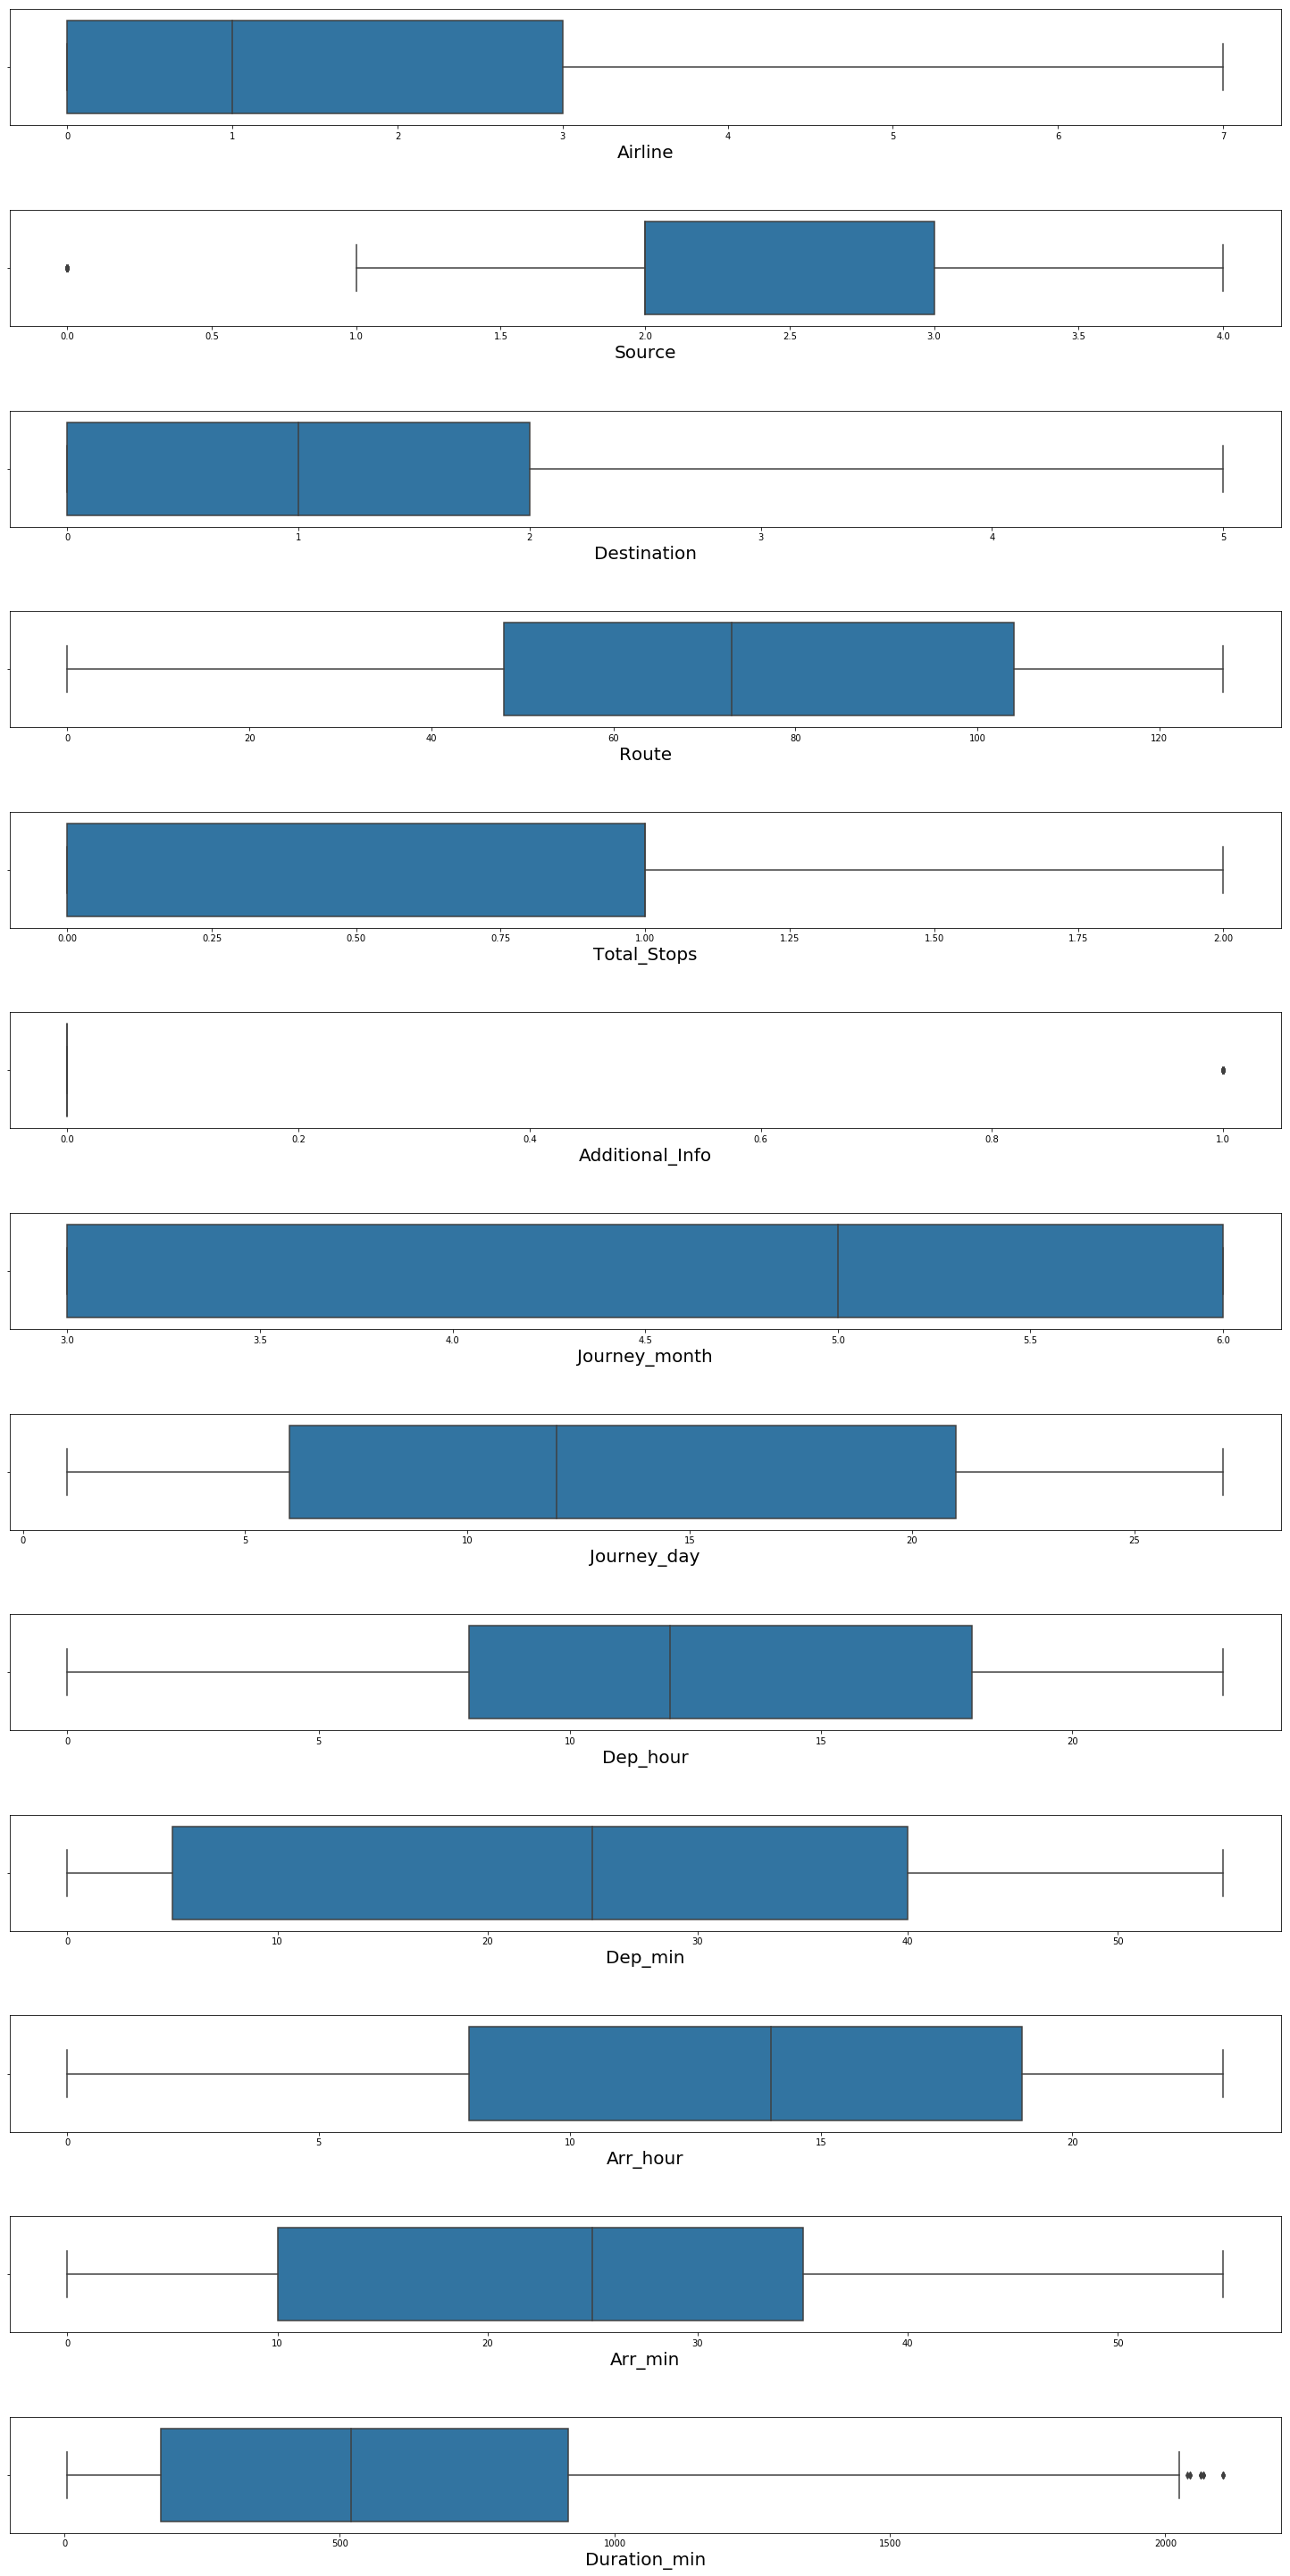

In [1256]:
plt.figure(figsize=(20,40))
plotno=1
for col in df_train.drop("Price",axis=1):
    if plotno<=13:
        ax=plt.subplot(13,1,plotno)
        sns.boxplot(df_train[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

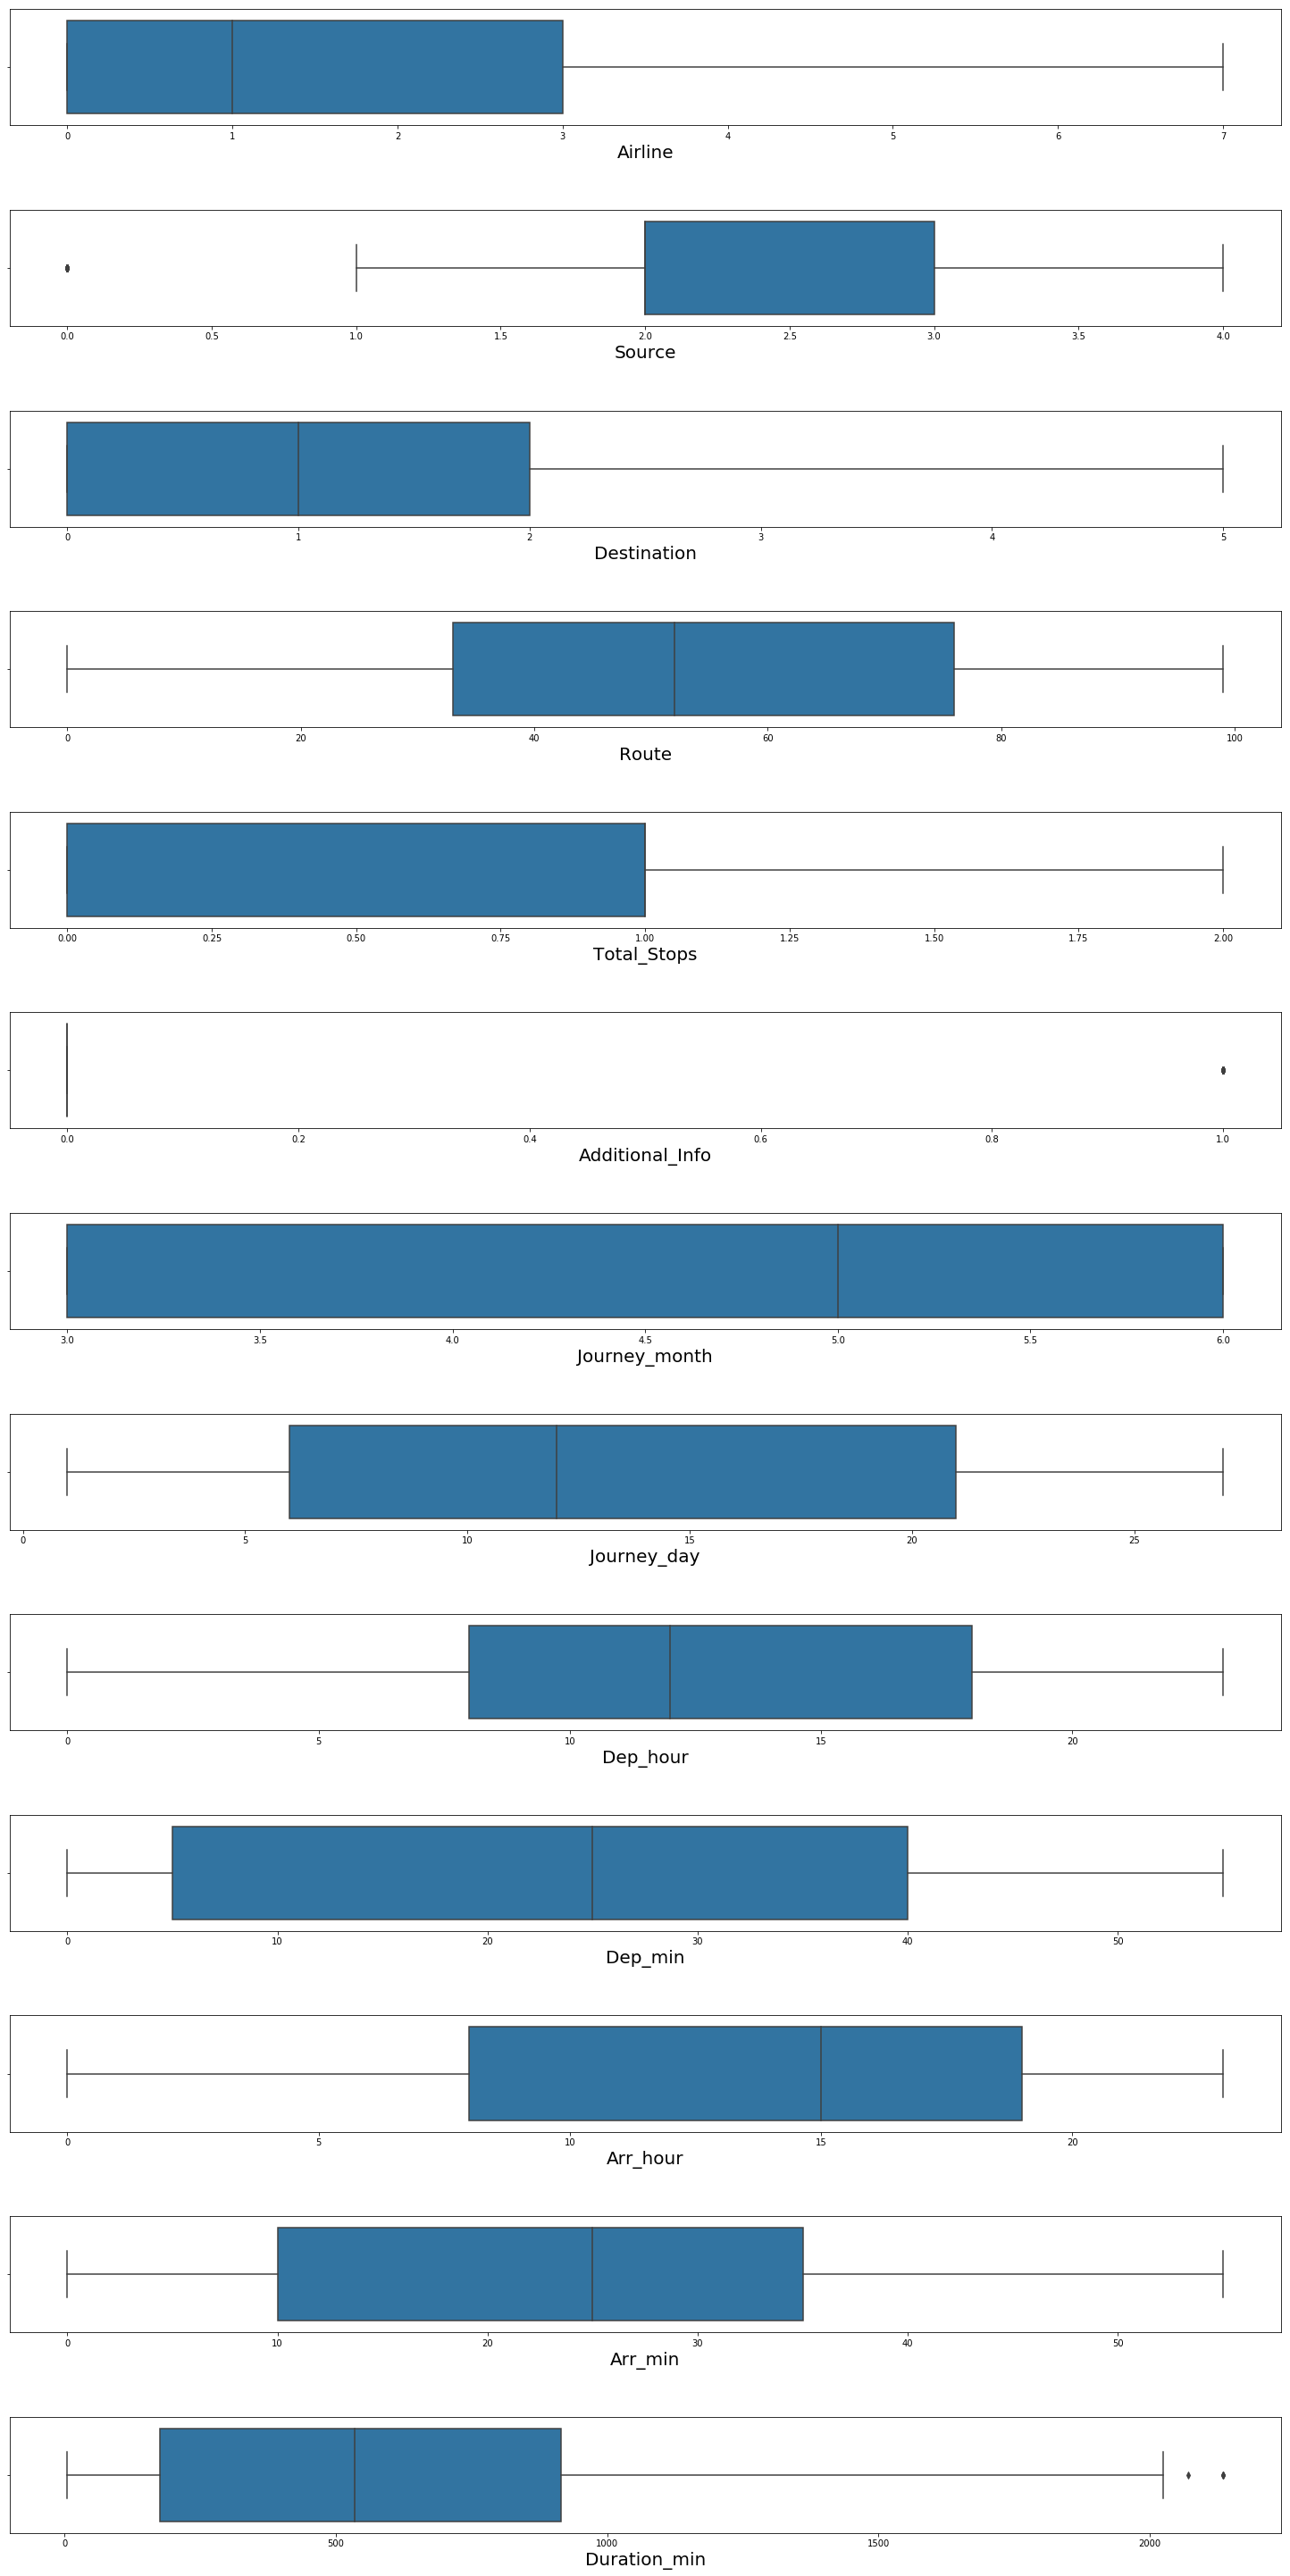

In [1257]:
plt.figure(figsize=(20,40))
plotno=1
for col in df_test:
    if plotno<=13:
        ax=plt.subplot(13,1,plotno)
        sns.boxplot(df_test[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [1258]:
df_train.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,1.663065,1.958083,1.412265,74.590536,0.809224,0.191977,9093.491897,4.713585,13.457883,12.544618,24.167167,13.462585,24.731393,632.581032
std,1.846625,1.175429,1.461463,36.465814,0.637591,0.393875,4362.386993,1.160505,8.442403,5.708555,18.774195,6.851655,16.675113,484.667796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,2.000000,0.000000,48.000000,0.000000,0.000000,5565.750000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000,175.000000
50%,1.000000,2.000000,1.000000,73.000000,1.000000,0.000000,8372.000000,5.000000,12.000000,12.000000,25.000000,14.000000,25.000000,520.000000
75%,3.000000,3.000000,2.000000,104.000000,1.000000,0.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,915.000000
max,7.000000,4.000000,5.000000,127.000000,2.000000,1.000000,54826.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000,2105.000000


Flights should take minimum 20 mins minimum duration to reach destination
the most of columns the std is nearly equal to std.

In [1260]:
df_train=df_train[df_train['Duration_min']>20]

In [1261]:
df_train.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
count,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000
mean,1.663032,1.957879,1.412106,74.593297,0.809105,0.191996,9092.668134,4.713757,13.458629,12.544272,24.164582,13.462331,24.728364,632.643822
std,1.846715,1.175311,1.461450,36.466594,0.637512,0.393890,4361.827672,1.160437,8.442495,5.708736,18.773356,6.851951,16.673198,484.651383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,75.000000
25%,0.000000,2.000000,0.000000,48.000000,0.000000,0.000000,5564.500000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000,175.000000
50%,1.000000,2.000000,1.000000,73.000000,1.000000,0.000000,8372.000000,5.000000,12.000000,12.000000,25.000000,14.000000,25.000000,520.000000
75%,3.000000,3.000000,2.000000,104.000000,1.000000,0.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,915.000000
max,7.000000,4.000000,5.000000,127.000000,2.000000,1.000000,54826.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000,2105.000000


Now data seems to be proper.

In [1263]:
df_test.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,1.732604,1.959343,1.415168,54.558249,0.840109,0.172791,4.726740,12.919468,12.666145,24.661845,13.666145,24.489836,640.781861
std,1.851032,1.173920,1.456861,26.977669,0.646160,0.378141,1.169283,8.246672,5.649344,19.028338,7.014675,16.883266,483.719431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,2.000000,0.000000,33.000000,0.000000,0.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000,175.000000
50%,1.000000,2.000000,1.000000,52.000000,1.000000,0.000000,5.000000,12.000000,12.000000,25.000000,15.000000,25.000000,535.000000
75%,3.000000,3.000000,2.000000,76.000000,1.000000,0.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,915.000000
max,7.000000,4.000000,5.000000,99.000000,2.000000,1.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000,2135.000000


Flights should take minimum 20 mins minimum duration to reach destination

In [1264]:
df_test=df_test[df_test['Duration_min']>20]

In [1265]:
df_test.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_min
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,1.732499,1.958545,1.414548,54.567071,0.839656,0.172859,4.727415,12.919828,12.664842,24.651936,13.665233,24.477904,641.030504
std,1.851387,1.173455,1.456809,26.979255,0.645879,0.378199,1.169013,8.248265,5.650064,19.025457,7.015895,16.875777,483.650519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,75.000000
25%,0.000000,2.000000,0.000000,33.000000,0.000000,0.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000,175.000000
50%,1.000000,2.000000,1.000000,52.000000,1.000000,0.000000,5.000000,12.000000,12.000000,25.000000,15.000000,25.000000,535.000000
75%,3.000000,3.000000,2.000000,76.000000,1.000000,0.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,915.000000
max,7.000000,4.000000,5.000000,99.000000,2.000000,1.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000,2135.000000


Now data seems to be proper.

##### Using PowerTransformer technique to normalize the data or removing skewness.

In [1266]:
features=['Airline','Destination','Route','Additional_Info','Duration_min']
scalar=PowerTransformer(method='yeo-johnson')
df_train[features]=scalar.fit_transform(df_train[features].values)
df_train[features].head()

,Airline,Destination,Route,Additional_Info,Duration_min
0,-0.010065,1.767006,-1.536718,-0.48746,-1.087018
1,0.580717,-1.361461,0.236265,-0.48746,-0.069866
2,-1.166071,0.024676,1.219198,-0.48746,1.073534
3,-0.010065,-1.361461,0.435876,-0.48746,-0.418062
4,-0.010065,1.767006,-1.260844,-0.48746,-0.558879


In [1267]:
df_train.skew()

Airline            0.074938
Source            -0.442835
Destination        0.043053
Route             -0.448671
Total_Stops        0.188361
Additional_Info    1.564223
Price              1.174036
Journey_month     -0.396421
Journey_day        0.131914
Dep_hour           0.080845
Dep_min            0.184911
Arr_hour          -0.386136
Arr_min            0.113398
Duration_min      -0.053367
dtype: float64

Now all features are in range of 0.5 to -0.5. thats means there is no skewed features. Exceptt Addtional_Info.

In [1268]:
features=["Airline",'Destination','Additional_Info','Duration_min']
scalar=PowerTransformer(method='yeo-johnson')
df_test[features]=scalar.fit_transform(df_test[features].values)
df_test[features].head()

,Airline,Destination,Additional_Info,Duration_min
0,-1.197586,0.016830,-0.457147,0.350054
1,-0.079859,-1.383872,-0.457147,-0.774893
2,-1.197586,0.016830,2.187480,1.367630
3,0.916542,0.016830,-0.457147,0.566815
4,1.448477,0.726095,-0.457147,-1.117470


In [1269]:
df_test.skew()

Airline            0.049783
Source            -0.442976
Destination        0.039961
Route             -0.320113
Total_Stops        0.164861
Additional_Info    1.731349
Journey_month     -0.418311
Journey_day        0.200114
Dep_hour           0.073772
Dep_min            0.140615
Arr_hour          -0.447927
Arr_min            0.121663
Duration_min      -0.061742
dtype: float64

Now all features are in range of 0.5 to -0.5. thats means there is no skewed features. Exceptt Addtional_Info.

#### Feature Selection

In [1270]:
df_train.drop(['Price'],axis=1).corrwith(df_train.Price)*100

Airline           -33.204303
Source              4.256682
Destination       -12.216075
Route              18.308832
Total_Stops        61.121822
Additional_Info     3.768444
Journey_month      -9.171286
Journey_day       -14.581571
Dep_hour            1.395092
Dep_min            -2.702772
Arr_hour            1.251774
Arr_min            -9.879264
Duration_min       60.265123
dtype: float64

In [1271]:
## Dropping Column that contribute less to predict Label/Prie of Flights for both train & test dataset.

df_train.drop(columns=["Additional_Info","Dep_hour","Arr_hour"],inplace=True)
df_test.drop(columns=["Additional_Info","Dep_hour","Arr_hour"],inplace=True)

### Data Loss

In [1272]:
df_train.shape

(9995, 11)

In [1273]:
df_test.shape

(2557, 10)

In [1274]:
print(f"Training data Lost:{round(((10683-9995)/10683)*100,2)}%")
print(f"Test data Lost:{round(((2671-2557)/2671)*100,2)}%")

Training data Lost:6.44%
Test data Lost:4.27%


### Model Deployment

In [1275]:
X=df_train.drop("Price",axis=1)
Y=df_train.Price

splitting data into fetures & labels.

Here X is our features & Y is our label.

In [1276]:
## Normalizing Both train &test dataset.

scalar=StandardScaler()
X_=scalar.fit_transform(X)
X__=scalar.fit_transform(df_test)

In [1277]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
Bagging=BaggingRegressor()
algo=[Linear,DecisionTree,Bagging,RandomForest,knn,AdaBoost]

In [1278]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(160,180):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=r2_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
            mae=mean_absolute_error(Y_test,Y_pred)
            mse=mean_squared_error(Y_test,Y_pred)
            rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"\n\n{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\nMEAN ABSOLUTE ERROR:",mae)

    print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
    print(f"\nROOT MEAN SQUARED ERROR for the model:",rmse)



LinearRegression():
---------------------------
---------------------------

The highest accuracy is 54.01383099465118 of model LinearRegression() at random state 168

MEAN ABSOLUTE ERROR: 2146.0488610291195

MEAN SQUARED ERROR for the model: 8290396.221302887

ROOT MEAN SQUARED ERROR for the model: 2879.304815628746


DecisionTreeRegressor():
---------------------------
---------------------------

The highest accuracy is 71.05472500622759 of model DecisionTreeRegressor() at random state 160

MEAN ABSOLUTE ERROR: 1342.764715691179

MEAN SQUARED ERROR for the model: 5214508.203928353

ROOT MEAN SQUARED ERROR for the model: 2283.5297685662767


BaggingRegressor():
---------------------------
---------------------------

The highest accuracy is 79.9049468102596 of model BaggingRegressor() at random state 170

MEAN ABSOLUTE ERROR: 1216.1412419395122

MEAN SQUARED ERROR for the model: 3923864.62675588

ROOT MEAN SQUARED ERROR for the model: 1980.8747125338039


RandomForestRegressor():
-

In [1279]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.4945065910963832 at k-fold::2

Mean CV Score of model LinearRegression():: 0.4944459361840967 at k-fold::3

Mean CV Score of model LinearRegression():: 0.49554866239745554 at k-fold::4

Mean CV Score of model LinearRegression():: 0.4943704886448025 at k-fold::5

Mean CV Score of model LinearRegression():: 0.4955050885359875 at k-fold::6

Mean CV Score of model LinearRegression():: 0.49484450425008675 at k-fold::7

Mean CV Score of model LinearRegression():: 0.49601079521921215 at k-fold::8

Mean CV Score of model LinearRegression():: 0.49547596881139744 at k-fold::9


DecisionTreeRegressor()
-------------------------


Mean CV Score of model DecisionTreeRegressor():: 0.6468651793365635 at k-fold::2

Mean CV Score of model DecisionTreeRegressor():: 0.6667287025585281 at k-fold::3

Mean CV Score of model DecisionTreeRegressor():: 0.6451501680131823 at k-fold::4

Mean CV Score of model DecisionTr

In [1280]:
CVmodel

{'LinearRegression()': [0.49601079521921215],
 'DecisionTreeRegressor()': [0.6840385592743244],
 'BaggingRegressor()': [0.7820673986231395],
 'RandomForestRegressor()': [0.7914857696693156],
 'KNeighborsRegressor()': [0.7262762908322954],
 'AdaBoostRegressor()': [0.4076414049136816]}

Showing maximun cvScore for each model.

In [1281]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(6):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LinearRegression()::4.41
DecisionTreeRegressor()::2.65
BaggingRegressor()::1.7
RandomForestRegressor()::1.32
KNeighborsRegressor()::2.47
AdaBoostRegressor()::8.31


here for model RandomForestRegressor we get the least value i.e. the difference between the accuracy and cvScore of this model is 1.76 .

In [1282]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=170)

### Plotting regplot graph for RandomForestRegressor model

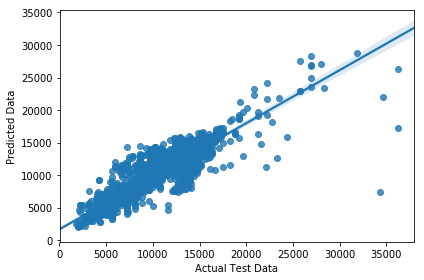

In [1283]:
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are not so close to the best fit line. That means the residual is high.

### Regularization

In [1284]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.06910000000000001, 'max_iter': 1000, 'normalize': True}

In [1285]:
lasso=Lasso(alpha= 0.0001, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

52.1772612088763

Here we can see that our model is not overfitted or underfitted as the r2 scoe Lasso model is 53.93 while the randomforest r2-score is 80.

### Hyper parameter Tuning

In [1288]:
param={
    'n_estimators':[100,90],
    'min_samples_split':[3,4],
    'max_depth':[None,20],
    'min_samples_leaf':[2,3]
}

In [1289]:
grid=GridSearchCV(RandomForest,param_grid=param)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 20], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 4],
                         'n_estimators': [100, 90]})

In [1290]:
grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [1291]:
RandomForest=RandomForestRegressor(n_estimators=100,min_samples_split=4,max_depth=None,min_samples_leaf=3)
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)

### Model Evaluation

In [1292]:
print(f"The model RandomForest Regressor has:: \n\t Accuracy :: {round(r2_score(Y_test,Y_pred)*100,2)}% \n\t Mean Absolute Error is :: {mean_absolute_error(Y_test,Y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(Y_test,Y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")


The model RandomForest Regressor has:: 
	 Accuracy :: 82.28% 
	 Mean Absolute Error is :: 1139.4811064099897 
	 Mean Squared Error is :: 3460869.017047114 
	 Root Mean Squared Error is :: 1860.3411023377175


there is increased in the accuracy.earleir it was 80.5% now its 82.28%

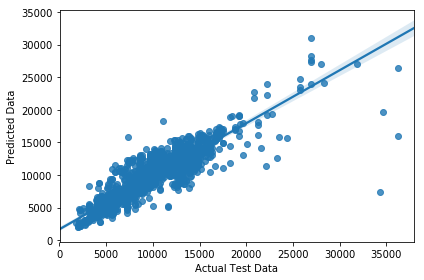

In [1293]:
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are very close to the best fit line.

In [1295]:
Y_test_pred=RandomForest.predict(X__)

In [1302]:
df = pd.DataFrame(Y_test_pred, columns = ['Price'])

In [1301]:
type(Y_test_pred)

numpy.ndarray

In [1303]:
df.to_excel('Submission.xlsx', index=False,header=True)

### Saving model.

In [1304]:
import pickle
pickle.dump(RandomForest,open("flightPricePrediction.pickle","wb"))